In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def prepare_file_paths(year, category):
    file_names = os.listdir(os.path.join('dataset_nyc_taxi', category, year))
    file_paths = [os.path.join('dataset_nyc_taxi', category, year, file_name) for file_name in file_names]
    return file_paths

In [3]:
prepare_file_paths('2020', 'green')

['dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-01.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-02.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-03.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-04.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-05.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-06.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-07.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-08.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-09.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-10.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-11.parquet',
 'dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-12.parquet']

In [4]:
prepare_file_paths('2020', 'yellow')

['dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-01.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-02.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-03.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-04.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-05.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-06.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-07.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-08.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-09.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-10.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-11.parquet',
 'dataset_nyc_taxi\\yellow\\2020\\yellow_tripdata_2020-12.parquet']

In [5]:
month_df = pd.read_parquet('dataset_nyc_taxi\\green\\2020\\green_tripdata_2020-01.parquet')
month_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2019-12-18 15:52:30,2019-12-18 15:54:39,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,None,0.3,4.81,1.0,1.0,0.00
1,2,2020-01-01 00:45:58,2020-01-01 00:56:39,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,None,0.3,24.36,1.0,2.0,0.00
2,2,2020-01-01 00:41:38,2020-01-01 00:52:49,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,None,0.3,15.34,1.0,1.0,0.00
3,1,2020-01-01 00:52:46,2020-01-01 01:14:21,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,None,0.3,25.05,2.0,1.0,2.75
4,1,2020-01-01 00:19:57,2020-01-01 00:30:56,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,None,0.3,11.30,1.0,1.0,0.00


In [6]:
months_in_years = {
    '2019' : range(1, 12),
    '2020' : range(12),
    '2021' : range(12),
    '2022' : range(12),
    '2023' : range(12),
}

number_to_month = {
    0: 'January',
    1: 'February',
    2: 'March',
    3: 'April',
    4: 'May',
    5: 'June',
    6: 'July',
    7: 'August',
    8: 'September',
    9: 'October',
    10: 'November',
    11: 'December'
}

In [7]:
params_type = ['trip_count', 'trip_time', 'trip_distance', 'total_amount', 'tip_amount', 'passenger_count']

dict_of_dicts = {f'{param_type}_dict': {} for param_type in params_type}

dict_of_dicts

{'trip_count_dict': {},
 'trip_time_dict': {},
 'trip_distance_dict': {},
 'total_amount_dict': {},
 'tip_amount_dict': {},
 'passenger_count_dict': {}}

In [8]:
def get_time_headers(vechicle_type):
    time_column = None
    start_time = None
    end_time = None
    
    if vechicle_type == 'green':
        time_column = 'lpep_pickup_datetime'
        start_time = 'lpep_pickup_datetime'
        end_time = 'lpep_dropoff_datetime'
    elif vechicle_type == 'yellow':
        time_column = 'tpep_pickup_datetime'
        start_time = 'tpep_pickup_datetime'
        end_time = 'tpep_dropoff_datetime'
    elif vechicle_type == 'fhv':
        time_column = 'request_datetime'
        start_time = 'pickup_datetime'
        end_time = 'dropoff_datetime'
    
    return time_column, start_time, end_time

In [50]:
params_type = ['trip_count', 'trip_time', 'trip_distance', 'total_amount', 'tip_amount', 'passenger_count']

def get_mean_values_by_month(vechicle_type):
    _, start_time, end_time = get_time_headers(vechicle_type)
    
    dict_of_dicts = {f'{param_type}': {} for param_type in params_type}

    if vechicle_type == 'fhv':
        dict_of_dicts['customer_waiting_time_dict'] = {}
        dict_of_dicts['driver_waiting_time_dict'] = {}
    
    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in range(len(filepaths)):
            month_df = pd.read_parquet(filepaths[i])
            label = f"{year} {number_to_month[months[i]].lower()}"
            size = month_df.shape[0]
            
            trip_time = month_df[end_time] - month_df[start_time]
            trip_time = trip_time[trip_time >= pd.Timedelta(0)]
            trip_time = trip_time[trip_time < pd.Timedelta(days=1)]

            if vechicle_type == 'fhv':
                
                customer_waiting_time = month_df['on_scene_datetime'] - month_df['request_datetime']
                customer_waiting_time = customer_waiting_time[customer_waiting_time >= pd.Timedelta(0)]
                customer_waiting_time = customer_waiting_time[customer_waiting_time < pd.Timedelta(days=1)]                
                dict_of_dicts['customer_waiting_time_dict'][label] = [customer_waiting_time.mean()]
                
                driver_waiting_time = month_df['pickup_datetime'] - month_df['on_scene_datetime']
                driver_waiting_time = driver_waiting_time[driver_waiting_time >= pd.Timedelta(0)]
                driver_waiting_time = driver_waiting_time[driver_waiting_time < pd.Timedelta(days=1)]
                dict_of_dicts['driver_waiting_time_dict'][label] = [driver_waiting_time.mean()]
                
                dict_of_dicts['trip_count_dict'][label] = [month_df.shape[0]]
                dict_of_dicts['trip_time_dict'][label] = [trip_time.mean()] 
                
                param_series = month_df['trip_miles']
                lower_outlier_bound = 0
                param_series = param_series[param_series > lower_outlier_bound]
                upper_outlier_bound = 1000 * param_series.median()
                param_series = param_series[param_series < upper_outlier_bound]
                dict_of_dicts['trip_distance_dict'][label] = [param_series.sum()/size]
                
                total_amount_series = month_df[['base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']].sum(axis=1)
                total_amount_series = total_amount_series[total_amount_series > 0]
                total_amount_series_median_1000 = 1000 * total_amount_series.median()
                total_amount_series = total_amount_series[total_amount_series < 1000 * total_amount_series_median_1000]
                dict_of_dicts['total_amount_dict'][label] = [total_amount_series.sum()/size]
                
                param_series = month_df['tips']
                lower_outlier_bound = 0
                param_series = param_series[param_series > lower_outlier_bound]
                upper_outlier_bound = 1000 * param_series.median()
                param_series = param_series[param_series < upper_outlier_bound]
                dict_of_dicts['tip_amount_dict'][label] = [param_series.sum()/size]
                
                dict_of_dicts['passenger_count_dict'][label] = [0]
            
            else:
                dict_of_dicts['trip_count_dict'][label] = [month_df.shape[0]]
                dict_of_dicts['trip_time_dict'][label] = [trip_time.sum()/size]
                for param_type in params_type[2:]:    
                    param_series = month_df[param_type]
                    lower_outlier_bound = 0
                    param_series = param_series[param_series > lower_outlier_bound]
                    upper_outlier_bound = 1000 * param_series.median()
                    param_series = param_series[param_series < upper_outlier_bound]
                    dict_of_dicts[f'{param_type}_dict'][label] = [param_series.sum()/size]
          
    return dict_of_dicts

In [51]:
green_dict_of_dicts = get_mean_values_by_month('green')

In [52]:
trip_distance_df = pd.DataFrame(green_dict_of_dicts['trip_distance_dict'])
trip_distance_df

,2019 february,2019 march,2019 april,2019 may,2019 june,2019 july,2019 august,2019 september,2019 october,2019 november,...,2023 march,2023 april,2023 may,2023 june,2023 july,2023 august,2023 september,2023 october,2023 november,2023 december
0,3.899452,3.852318,3.518961,3.371776,3.350951,3.320432,3.483302,3.519991,3.54363,3.234219,...,2.846854,2.902336,2.959869,3.130989,3.122278,3.169183,3.257122,2.962142,2.870951,2.902659


In [53]:
yellow_dict_of_dicts = get_mean_values_by_month('yellow')

In [54]:
fhv_dict_of_dicts = get_mean_values_by_month('fhv')

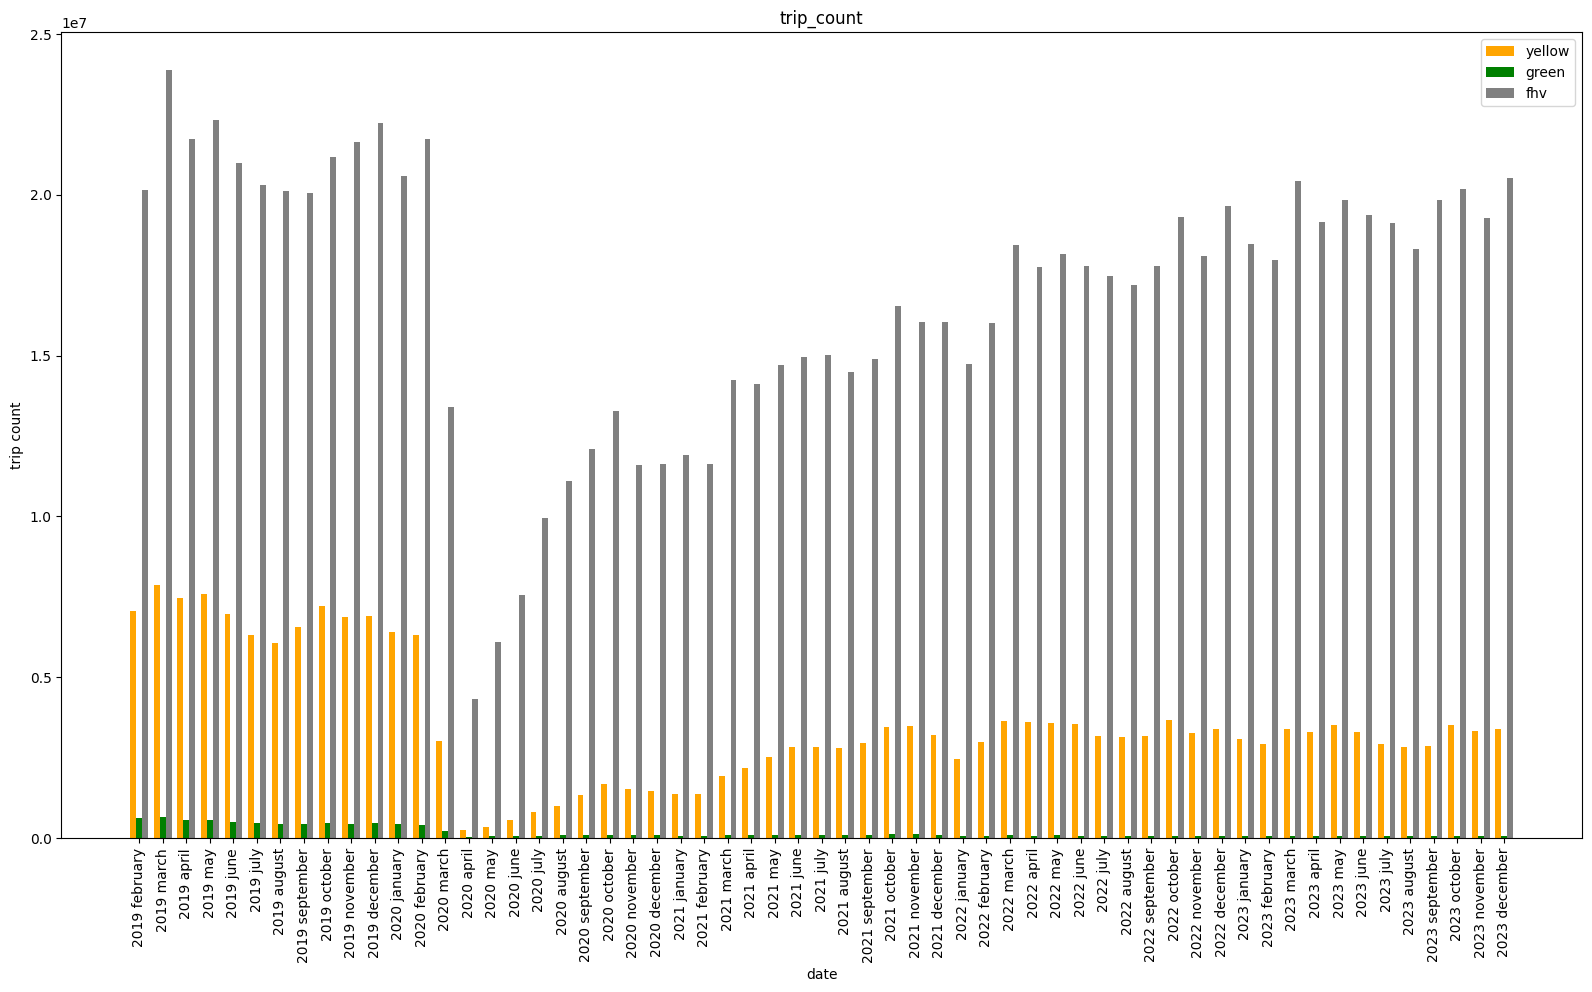

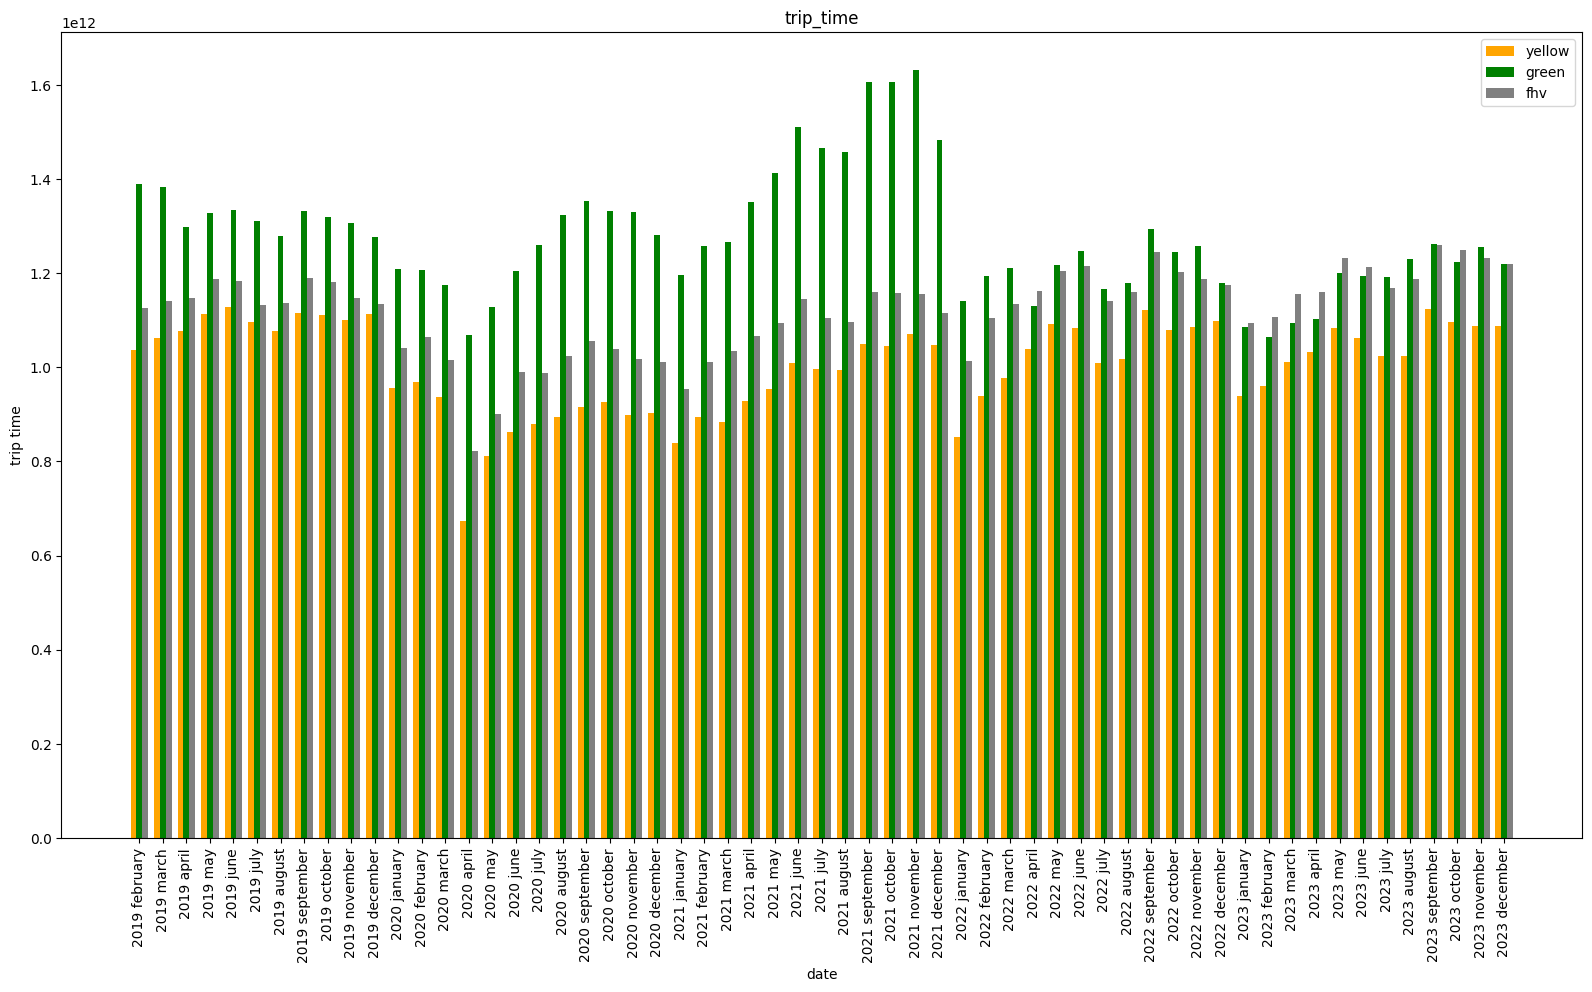

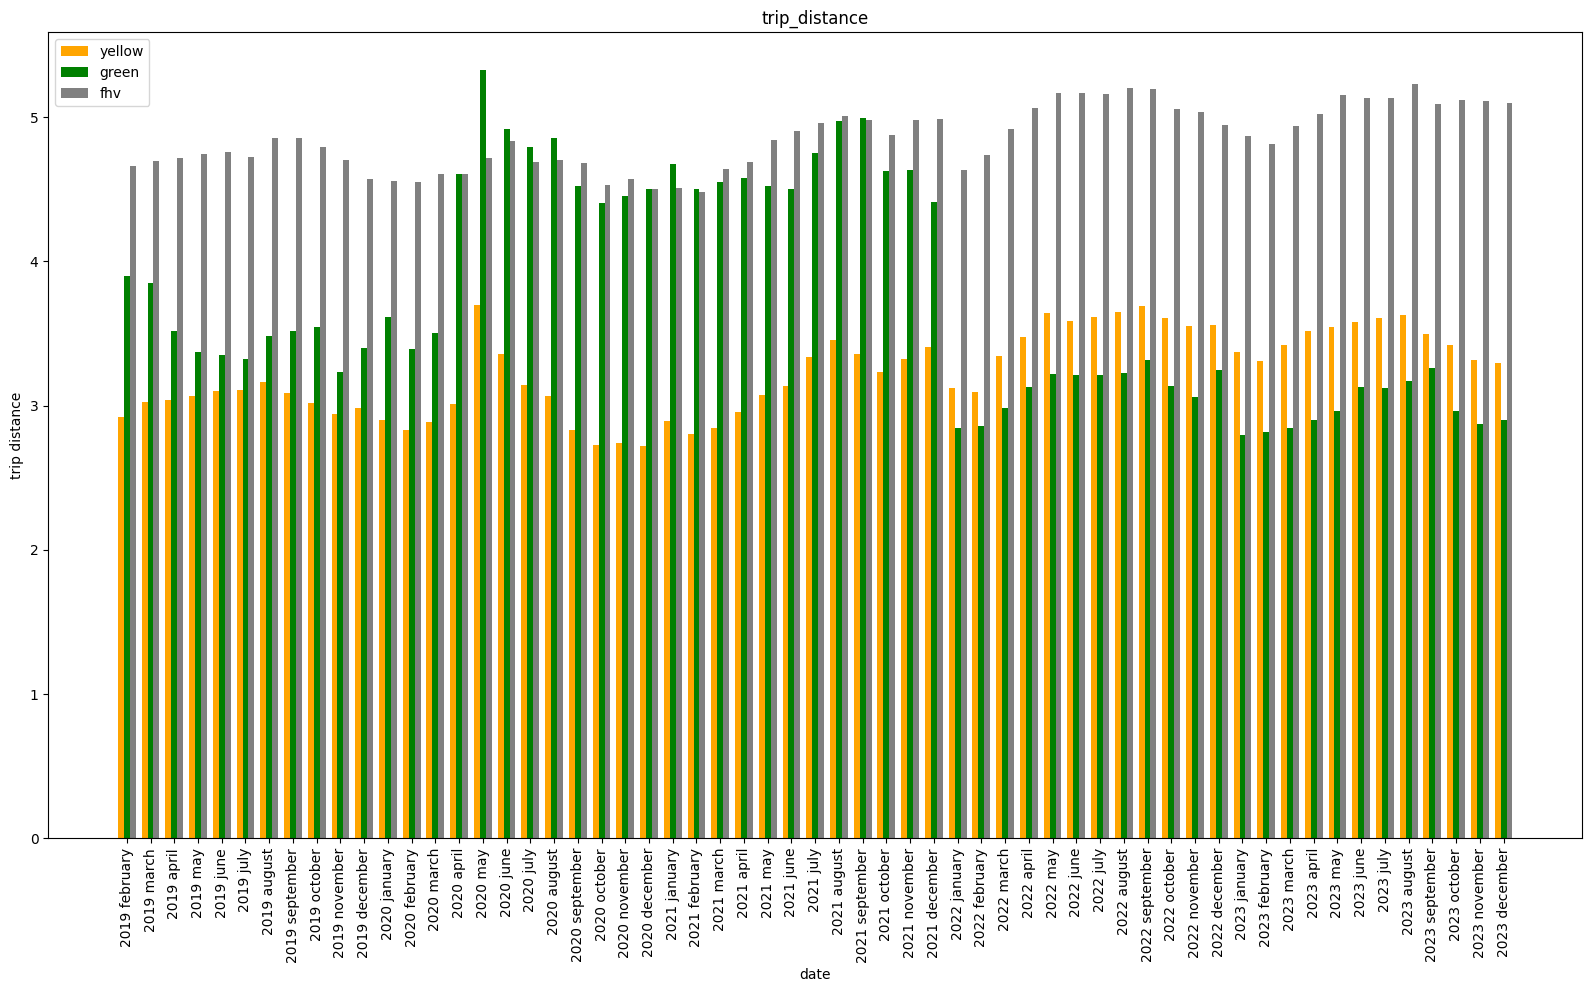

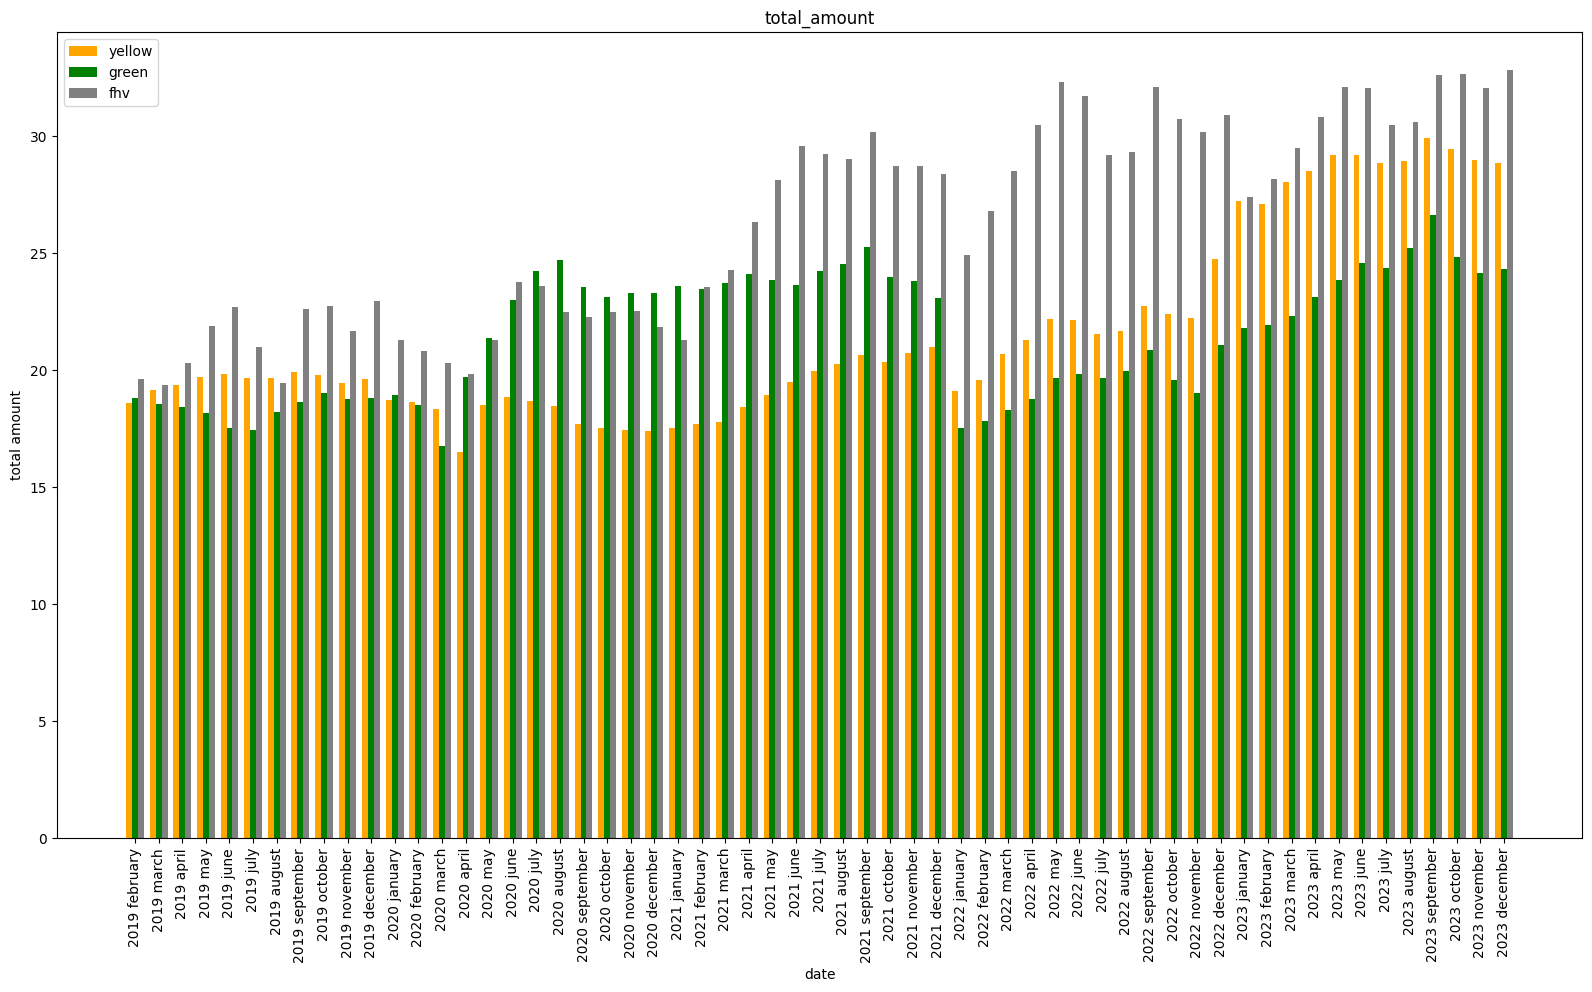

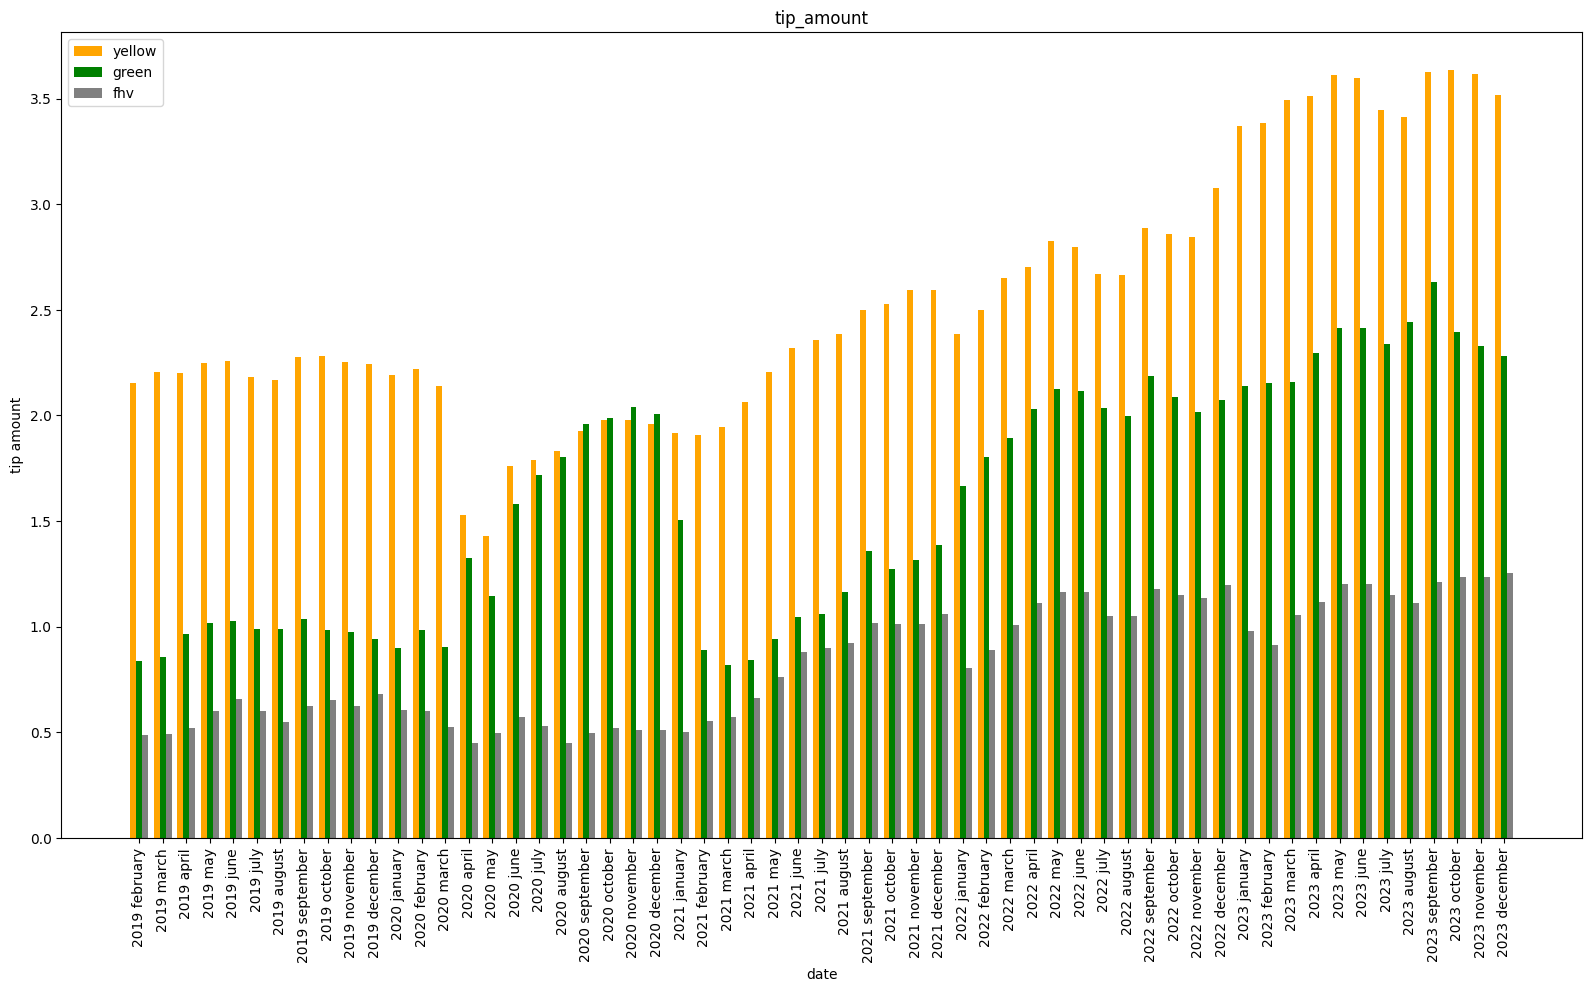

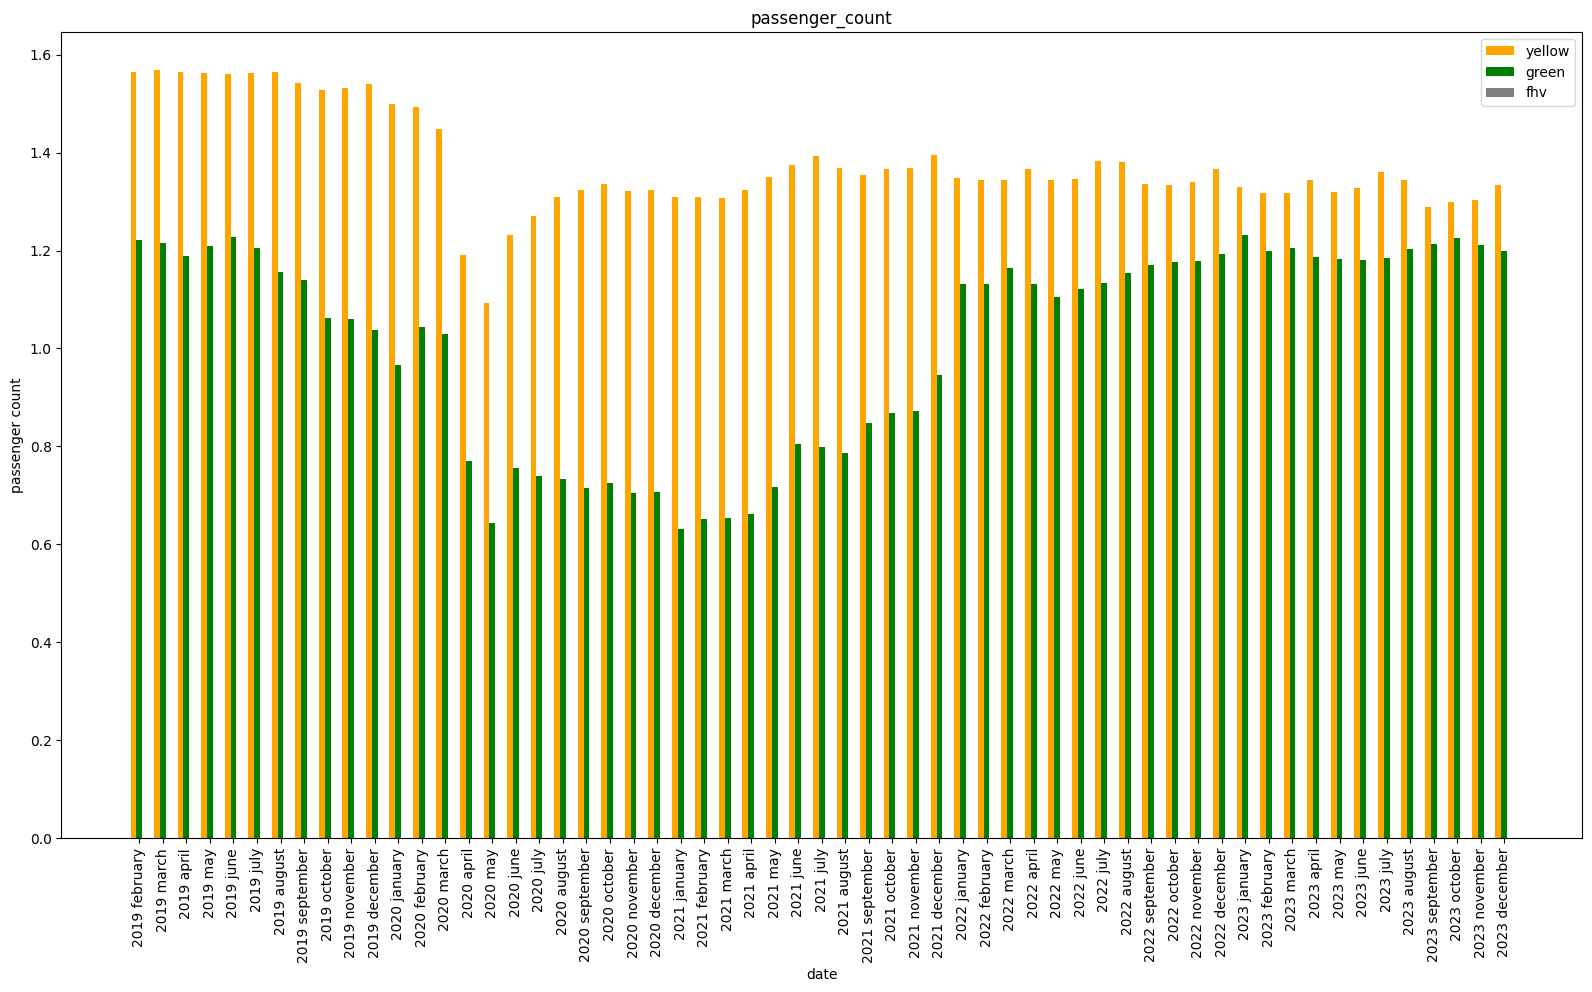

In [55]:
WIDTH = 0.25

for param_type in params_type: 
    green_param_df = pd.DataFrame(green_dict_of_dicts[f'{param_type}_dict'])
    yellow_param_df = pd.DataFrame(yellow_dict_of_dicts[f'{param_type}_dict'])
    fhv_param_df = pd.DataFrame(fhv_dict_of_dicts[f'{param_type}_dict'])
    
    position = np.arange(59)
    plt.figure(figsize=(16, 10))

    plt.bar(position - WIDTH, yellow_param_df.loc[0], width=WIDTH, label='yellow', color='orange')
    plt.bar(position, green_param_df.loc[0], width=WIDTH, label='green', color='green')
    plt.bar(position + WIDTH, fhv_param_df.loc[0], width=WIDTH, label='fhv', color='gray')

    plt.ylabel(param_type.replace('_', ' '))
    plt.xlabel('date')
    plt.title(f'{param_type}')
    plt.xticks(position, green_param_df.columns, rotation='vertical')
    plt.legend()

    plt.tight_layout(pad=1)
    plt.savefig(f'plots/general/{param_type}.png')
    plt.show()

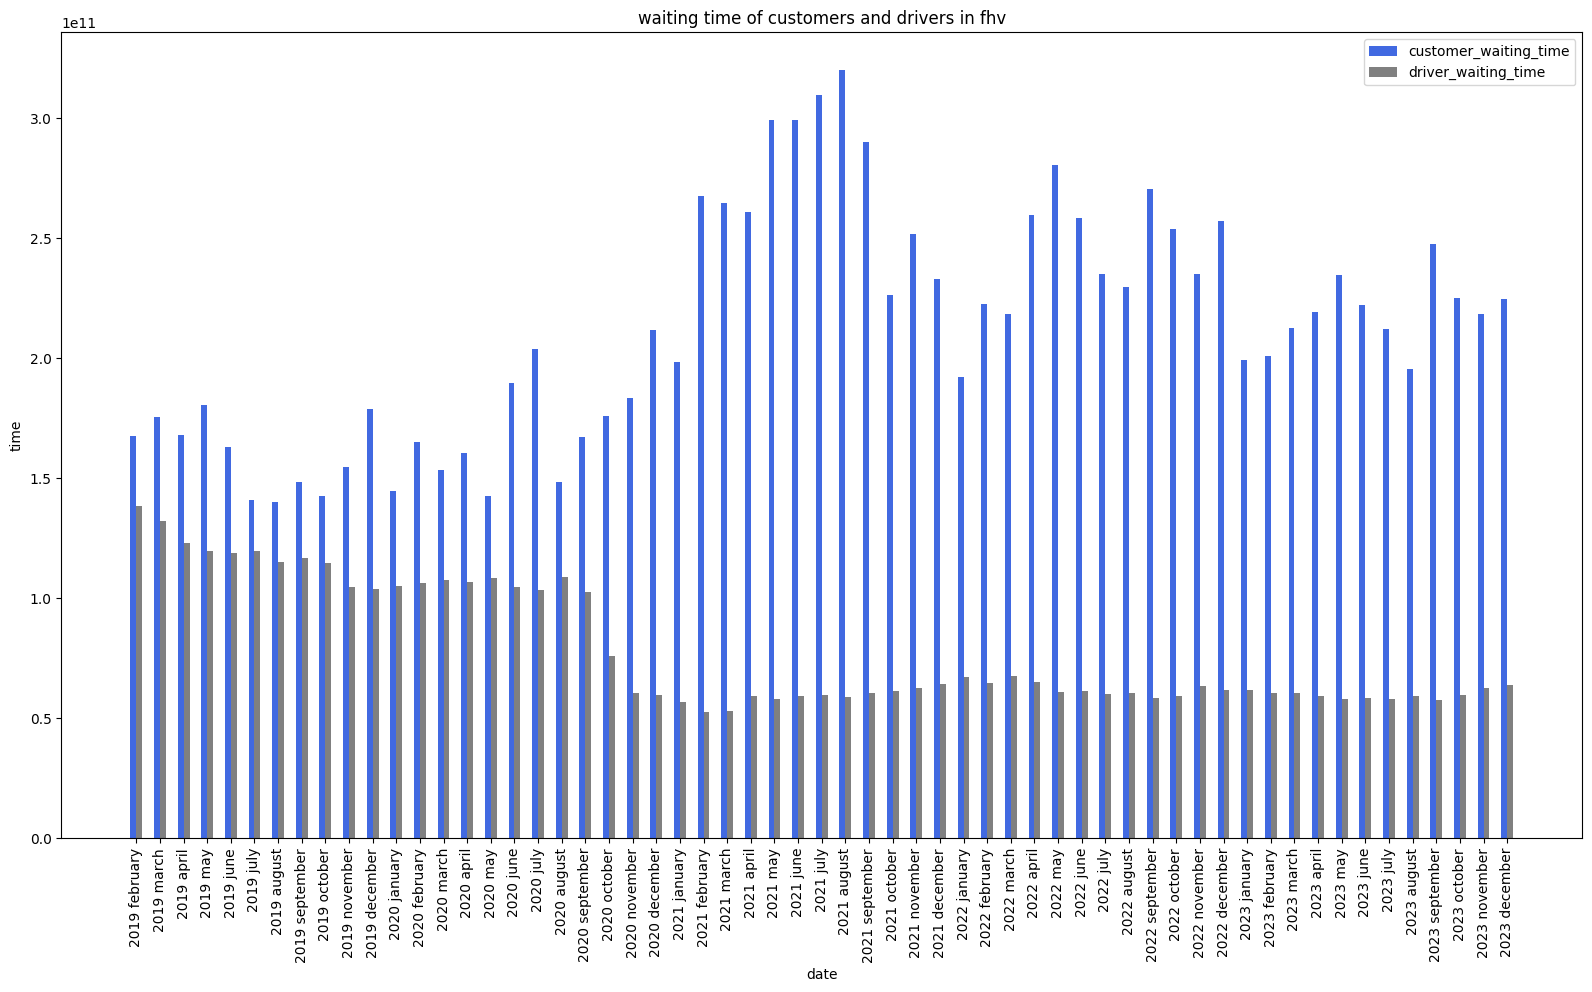

In [56]:
customer_waiting_time_df = pd.DataFrame(fhv_dict_of_dicts['customer_waiting_time_dict'])
driver_waiting_time_df = pd.DataFrame(fhv_dict_of_dicts['driver_waiting_time_dict'])

DUO_WIDTH = 0.4

position = np.arange(59)
plt.figure(figsize=(16, 10))

plt.bar(position - WIDTH/2, customer_waiting_time_df.loc[0], width=WIDTH, label='customer_waiting_time', color='royalblue')
plt.bar(position + WIDTH/2, driver_waiting_time_df.loc[0], width=WIDTH, label='driver_waiting_time', color='gray')

plt.ylabel('time')
plt.xlabel('date')
plt.title('waiting time of customers and drivers in fhv')
plt.xticks(position, customer_waiting_time_df.columns, rotation='vertical')
plt.legend()

plt.tight_layout(pad=1)
plt.savefig(f'plots/general/waiting_time.png')
plt.show()

In [57]:
time_column = 'lpep_pickup_datetime'
start_time = 'lpep_pickup_datetime'
end_time = 'lpep_dropoff_datetime'

i = 3
weekday_month_df = month_df[month_df[time_column].dt.dayofweek == i]

In [82]:
params_type = ['trip_count', 'trip_time', 'trip_distance', 'total_amount', 'tip_amount', 'passenger_count']

def get_mean_values_by_weekday(vechicle_type):
    time_column, start_time, end_time = get_time_headers(vechicle_type)
    
    dict_of_dicts = {f'{param_type}': [] for param_type in params_type}
    
    dict_of_dicts['year'] = []
    dict_of_dicts['month'] = []
    dict_of_dicts['weekday'] = []

    if vechicle_type == 'fhv':
        dict_of_dicts['customer_waiting_time'] = []
        dict_of_dicts['driver_waiting_time'] = []
    
    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in range(len(filepaths)):
            all_days_month_df = pd.read_parquet(filepaths[i])
            
            for weekday in range(7):
                dict_of_dicts['year'].append(year),
                dict_of_dicts['month'].append(months_in_years[year][i])
                dict_of_dicts['weekday'].append(weekday)
                
                month_df = all_days_month_df[all_days_month_df[time_column].dt.dayofweek == weekday]

                size = month_df.shape[0]

                trip_time = month_df[end_time] - month_df[start_time]
                trip_time = trip_time[trip_time >= pd.Timedelta(0)]
                trip_time = trip_time[trip_time < pd.Timedelta(days=1)]
                
                dict_of_dicts['trip_count'].append(month_df.shape[0])
                dict_of_dicts['trip_time'].append(trip_time.mean())

                if vechicle_type == 'fhv':
                    customer_waiting_time = month_df['on_scene_datetime'] - month_df['request_datetime']
                    customer_waiting_time = customer_waiting_time[customer_waiting_time >= pd.Timedelta(0)]
                    customer_waiting_time = customer_waiting_time[customer_waiting_time < pd.Timedelta(days=1)]                
                    dict_of_dicts['customer_waiting_time'].append(customer_waiting_time.mean())

                    driver_waiting_time = month_df['pickup_datetime'] - month_df['on_scene_datetime']
                    driver_waiting_time = driver_waiting_time[driver_waiting_time >= pd.Timedelta(0)]
                    driver_waiting_time = driver_waiting_time[driver_waiting_time < pd.Timedelta(days=1)]
                    dict_of_dicts['driver_waiting_time'].append(driver_waiting_time.mean())
                    
                    param_series = month_df['trip_miles']
                    lower_outlier_bound = 0
                    param_series = param_series[param_series > lower_outlier_bound]
                    upper_outlier_bound = 1000 * param_series.median()
                    param_series = param_series[param_series < upper_outlier_bound]
                    dict_of_dicts['trip_distance'].append(param_series.sum()/size)

                    total_amount_series = month_df[['base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']].sum(axis=1)
                    total_amount_series = total_amount_series[total_amount_series > 0]
                    total_amount_series_median_1000 = 1000 * total_amount_series.median()
                    total_amount_series = total_amount_series[total_amount_series < 1000 * total_amount_series_median_1000]
                    dict_of_dicts['total_amount'].append(total_amount_series.sum()/size)

                    param_series = month_df['tips']
                    lower_outlier_bound = 0
                    param_series = param_series[param_series > lower_outlier_bound]
                    upper_outlier_bound = 1000 * param_series.median()
                    param_series = param_series[param_series < upper_outlier_bound]
                    dict_of_dicts['tip_amount'].append(param_series.sum()/size)

                    dict_of_dicts['passenger_count'].append(None)

                else:
                    for param_type in params_type[2:]:    
                        param_series = month_df[param_type]
                        lower_outlier_bound = 0
                        param_series = param_series[param_series > lower_outlier_bound]
                        upper_outlier_bound = 1000 * param_series.median()
                        param_series = param_series[param_series < upper_outlier_bound]
                        dict_of_dicts[f'{param_type}'].append(param_series.sum()/size)

    return dict_of_dicts

In [83]:
green_dict_to_df = get_mean_values_by_weekday('green')
df = pd.DataFrame(green_dict_to_df)

In [84]:
df.size

3717

In [85]:
df

,trip_count,trip_time,trip_distance,total_amount,tip_amount,passenger_count,year,month,weekday
0,81228,0 days 00:22:38.089404870,3.973914,19.052184,0.801165,1.207625,2019,1,0
1,84383,0 days 00:23:10.681429248,4.084550,19.553963,0.786044,1.195039,2019,1,1
2,90801,0 days 00:23:50.923181973,3.922025,19.167298,0.811978,1.208203,2019,1,2
3,92125,0 days 00:24:05.837459972,3.982533,19.397563,0.844837,1.213178,2019,1,3
4,100991,0 days 00:23:56.483661748,3.835171,18.879826,0.822448,1.216227,2019,1,4
...,...,...,...,...,...,...,...,...,...
408,9415,0 days 00:20:19.050451407,2.841067,24.292452,2.239391,1.181413,2023,11,2
409,9358,0 days 00:20:46.126843342,2.812217,24.479124,2.306498,1.206454,2023,11,3
410,11750,0 days 00:21:25.507234042,2.889397,24.742073,2.255209,1.200936,2023,11,4
411,9452,0 days 00:21:26.324693186,2.974211,24.424288,2.322243,1.246085,2023,11,5


In [86]:
for vechicle_type in ['yellow', 'green', 'fhv']:
    dict_for_df = get_mean_values_by_weekday(vechicle_type)
    df = pd.DataFrame(dict_for_df)
    df.to_csv(f'dataset_nyc_taxi/weekday_csv/{vechicle_type}_weekday.csv', index=False)

In [87]:
params_type = ['trip_count', 'trip_time', 'trip_distance', 'total_amount', 'tip_amount', 'passenger_count']

def get_mean_values_by_hour(vechicle_type):
    time_column, start_time, end_time = get_time_headers(vechicle_type)
    
    dict_of_dicts = {f'{param_type}': [] for param_type in params_type}
    
    dict_of_dicts['year'] = []
    dict_of_dicts['month'] = []
    dict_of_dicts['hour'] = []

    if vechicle_type == 'fhv':
        dict_of_dicts['customer_waiting_time'] = []
        dict_of_dicts['driver_waiting_time'] = []
    
    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in range(len(filepaths)):
            all_days_month_df = pd.read_parquet(filepaths[i])
            
            for hour in range(24):
                dict_of_dicts['year'].append(year),
                dict_of_dicts['month'].append(months_in_years[year][i])
                dict_of_dicts['hour'].append(hour)
                
                month_df = all_days_month_df[all_days_month_df[time_column].dt.hour == hour]
                
                # all below is same as in get_mean_values_by_weekday()

                size = month_df.shape[0]

                trip_time = month_df[end_time] - month_df[start_time]
                trip_time = trip_time[trip_time >= pd.Timedelta(0)]
                trip_time = trip_time[trip_time < pd.Timedelta(days=1)]
                
                dict_of_dicts['trip_count'].append(month_df.shape[0])
                dict_of_dicts['trip_time'].append(trip_time.mean())

                if vechicle_type == 'fhv':
                    customer_waiting_time = month_df['on_scene_datetime'] - month_df['request_datetime']
                    customer_waiting_time = customer_waiting_time[customer_waiting_time >= pd.Timedelta(0)]
                    customer_waiting_time = customer_waiting_time[customer_waiting_time < pd.Timedelta(days=1)]                
                    dict_of_dicts['customer_waiting_time'].append(customer_waiting_time.mean())

                    driver_waiting_time = month_df['pickup_datetime'] - month_df['on_scene_datetime']
                    driver_waiting_time = driver_waiting_time[driver_waiting_time >= pd.Timedelta(0)]
                    driver_waiting_time = driver_waiting_time[driver_waiting_time < pd.Timedelta(days=1)]
                    dict_of_dicts['driver_waiting_time'].append(driver_waiting_time.mean())
                    
                    param_series = month_df['trip_miles']
                    lower_outlier_bound = 0
                    param_series = param_series[param_series > lower_outlier_bound]
                    upper_outlier_bound = 1000 * param_series.median()
                    param_series = param_series[param_series < upper_outlier_bound]
                    dict_of_dicts['trip_distance'].append(param_series.sum()/size)

                    total_amount_series = month_df[['base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']].sum(axis=1)
                    total_amount_series = total_amount_series[total_amount_series > 0]
                    total_amount_series_median_1000 = 1000 * total_amount_series.median()
                    total_amount_series = total_amount_series[total_amount_series < 1000 * total_amount_series_median_1000]
                    dict_of_dicts['total_amount'].append(total_amount_series.sum()/size)

                    param_series = month_df['tips']
                    lower_outlier_bound = 0
                    param_series = param_series[param_series > lower_outlier_bound]
                    upper_outlier_bound = 1000 * param_series.median()
                    param_series = param_series[param_series < upper_outlier_bound]
                    dict_of_dicts['tip_amount'].append(param_series.sum()/size)

                    dict_of_dicts['passenger_count'].append(None)

                else:
                    for param_type in params_type[2:]:    
                        param_series = month_df[param_type]
                        lower_outlier_bound = 0
                        param_series = param_series[param_series > lower_outlier_bound]
                        upper_outlier_bound = 1000 * param_series.median()
                        param_series = param_series[param_series < upper_outlier_bound]
                        dict_of_dicts[f'{param_type}'].append(param_series.sum()/size)

    return dict_of_dicts

In [88]:
for vechicle_type in ['yellow', 'green', 'fhv']:
    dict_for_df = get_mean_values_by_hour(vechicle_type)
    df = pd.DataFrame(dict_for_df)
    df.to_csv(f'dataset_nyc_taxi/hour_csv/{vechicle_type}_hour.csv', index=False)

In [57]:
hours_df = pd.read_csv(f'dataset_nyc_taxi/hour_csv/fhv_hour.csv')
hours_df

,trip_count,trip_time,trip_distance,total_amount,tip_amount,passenger_count,year,month,hour,customer_waiting_time,driver_waiting_time
0,730229,0 days 00:16:57.204519404,5.029414,19.044273,0.425661,NaN,2019,1,0,0 days 00:02:48.930376821,0 days 00:02:17.133743360
1,499832,0 days 00:16:01.535229837,4.961639,18.364852,0.384945,NaN,2019,1,1,0 days 00:02:35.066534614,0 days 00:02:18.984045836
2,351701,0 days 00:15:49.297678994,5.092125,18.491071,0.360185,NaN,2019,1,2,0 days 00:02:43.064434075,0 days 00:02:19.293122296
3,272733,0 days 00:16:15.236979023,5.709539,20.248606,0.384760,NaN,2019,1,3,0 days 00:02:57.910914418,0 days 00:02:22.296944580
4,255300,0 days 00:17:18.111985898,6.771456,23.506509,0.529123,NaN,2019,1,4,0 days 00:03:18.204565267,0 days 00:02:21.523653637
...,...,...,...,...,...,...,...,...,...,...,...
1411,1208533,0 days 00:19:43.893800996,4.626597,30.776255,1.153504,NaN,2023,11,19,0 days 00:03:31.364059241,0 days 00:01:02.022465951
1412,1152257,0 days 00:19:19.973554510,5.029742,31.395329,1.209870,NaN,2023,11,20,0 days 00:03:26.193434622,0 days 00:01:01.926082924
1413,1116720,0 days 00:19:09.542371409,5.324917,33.595301,1.328224,NaN,2023,11,21,0 days 00:03:41.238529967,0 days 00:01:00.738979718
1414,1117768,0 days 00:19:16.260195317,5.459918,34.380191,1.302217,NaN,2023,11,22,0 days 00:04:05.680767408,0 days 00:00:59.655123420


In [37]:
hours_df[hours_df['hour'] == i]['trip_count'].sum()

295385

In [70]:
hours_df['customer_waiting_time'] = pd.to_timedelta(hours_df['customer_waiting_time']).dt.total_seconds()
hours_df['customer_waiting_time']

0       1.680000e-07
1       1.550000e-07
2       1.630000e-07
3       1.770000e-07
4       1.980000e-07
            ...     
1411    2.110000e-07
1412    2.060000e-07
1413    2.210000e-07
1414    2.450000e-07
1415    2.580000e-07
Name: customer_waiting_time, Length: 1416, dtype: float64

In [7]:
columns = hours_df.columns
columns

Index(['trip_count', 'trip_time', 'trip_distance', 'total_amount',
       'tip_amount', 'passenger_count', 'year', 'month', 'hour'],
      dtype='object')

In [20]:
numeric_columns = list(hours_df.columns)[2:-3]
print(numeric_columns)

['trip_distance', 'total_amount', 'tip_amount', 'passenger_count']


['trip_distance', 'total_amount', 'tip_amount', 'passenger_count']


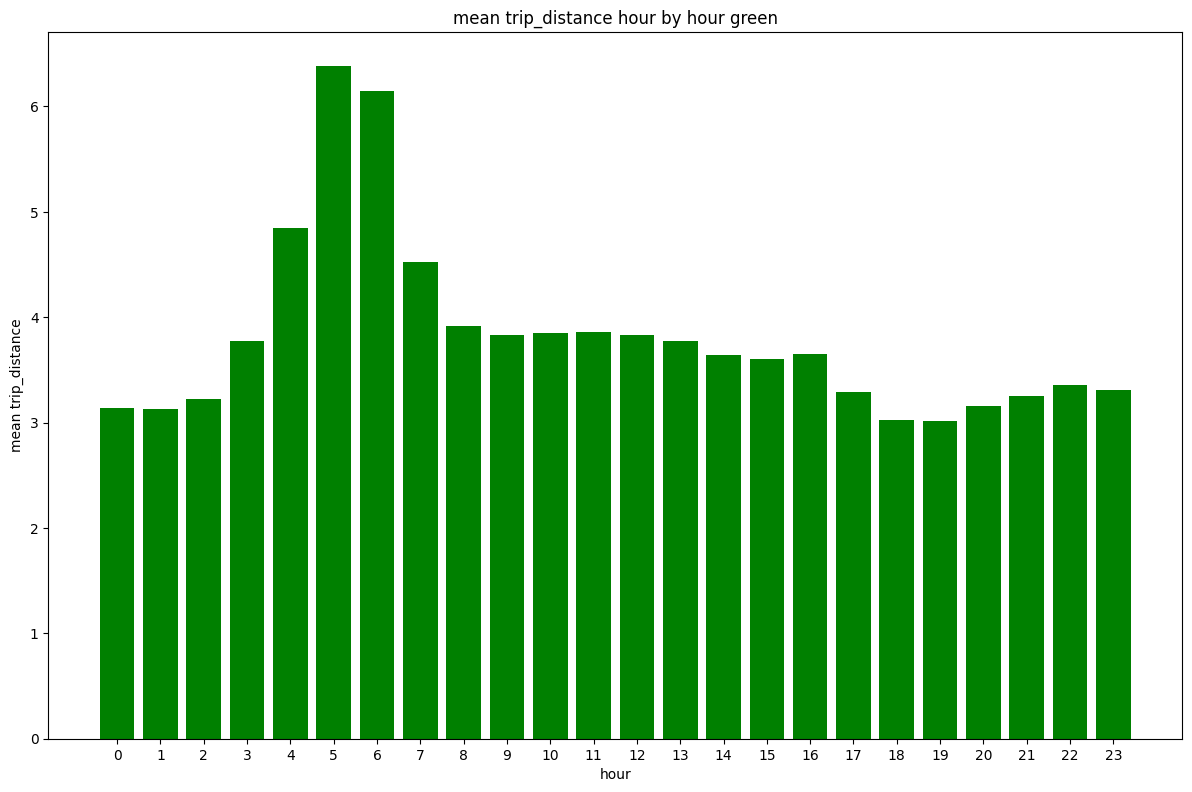

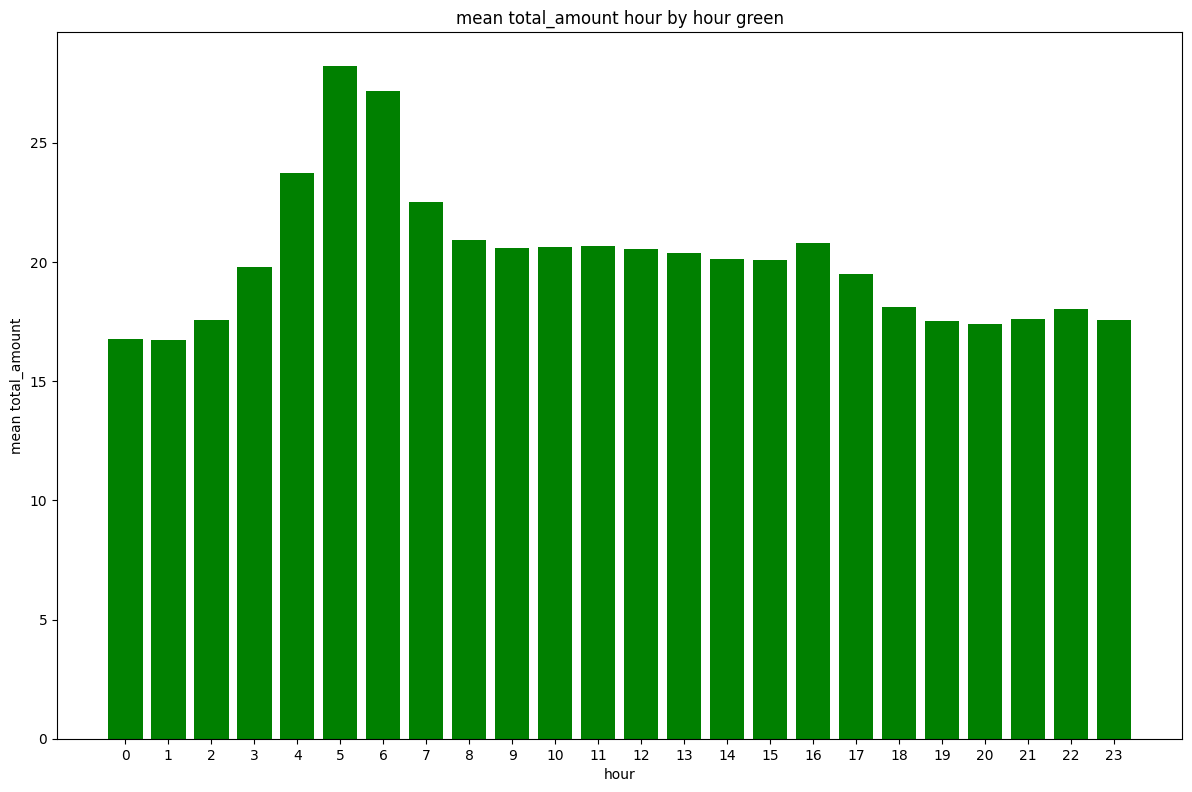

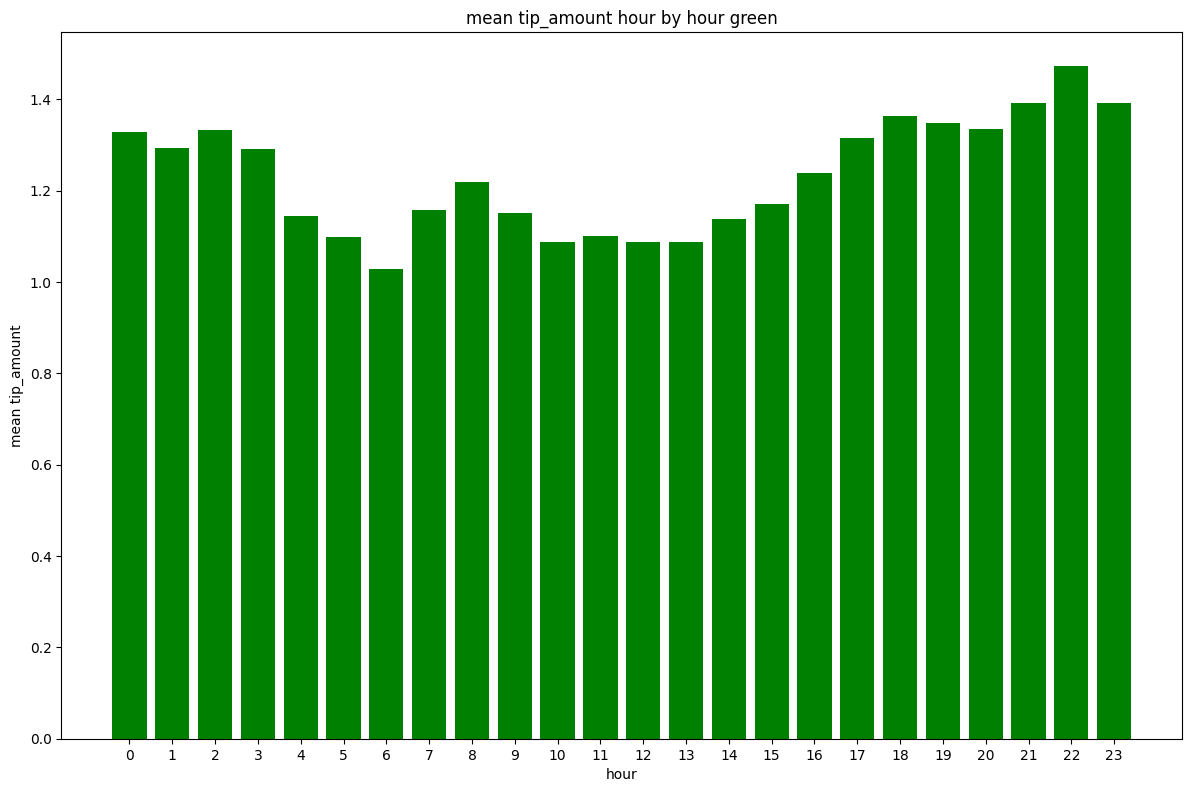

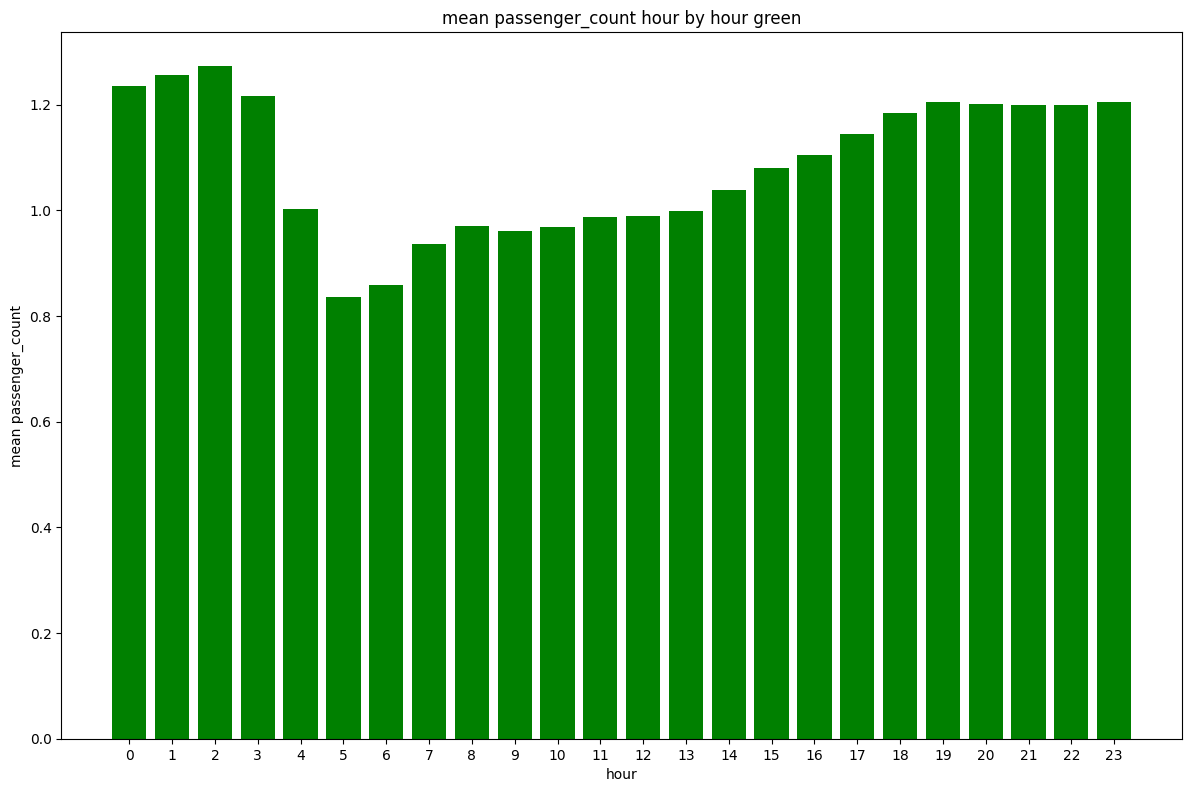

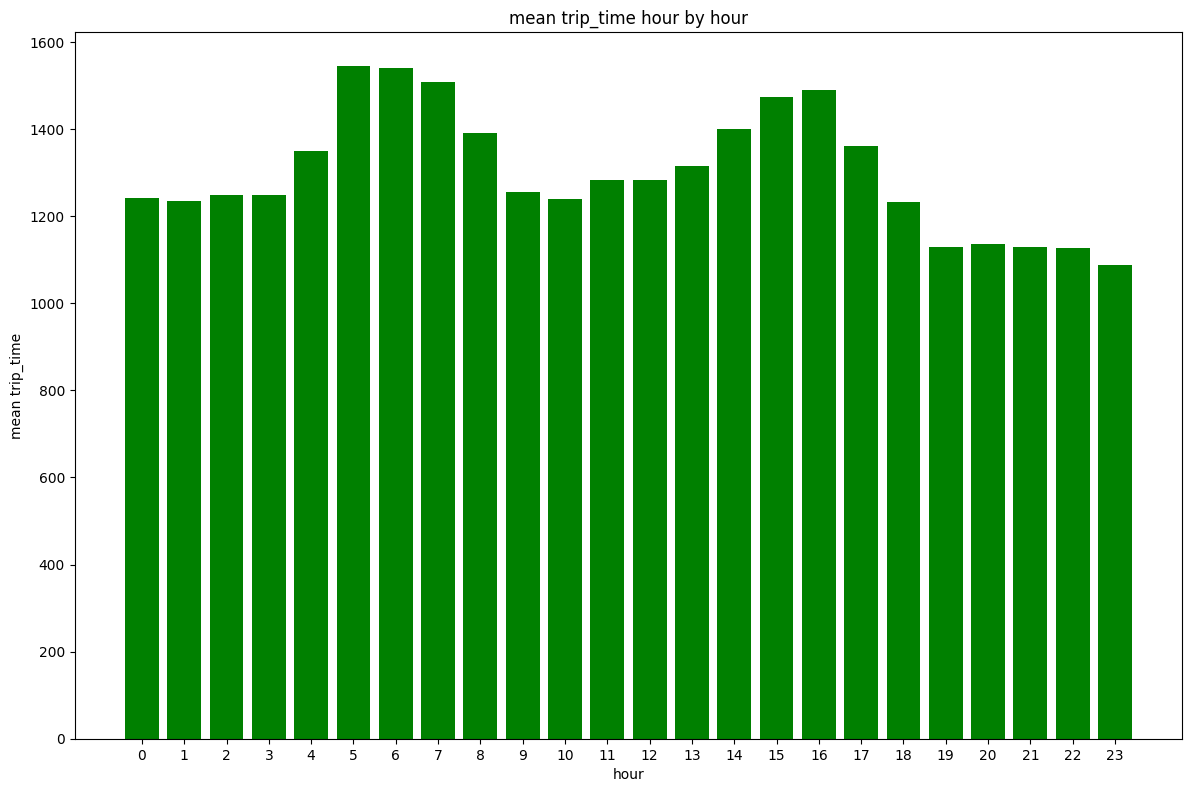

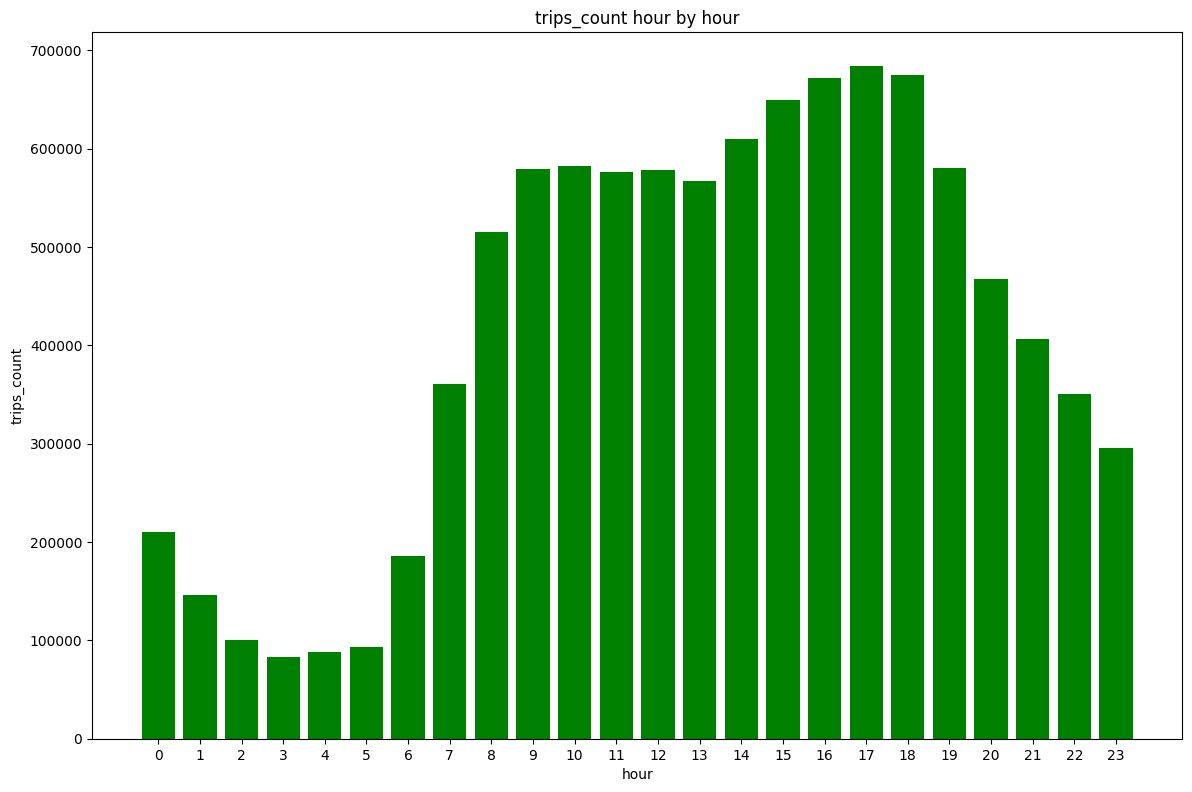

['trip_distance', 'total_amount', 'tip_amount', 'passenger_count']


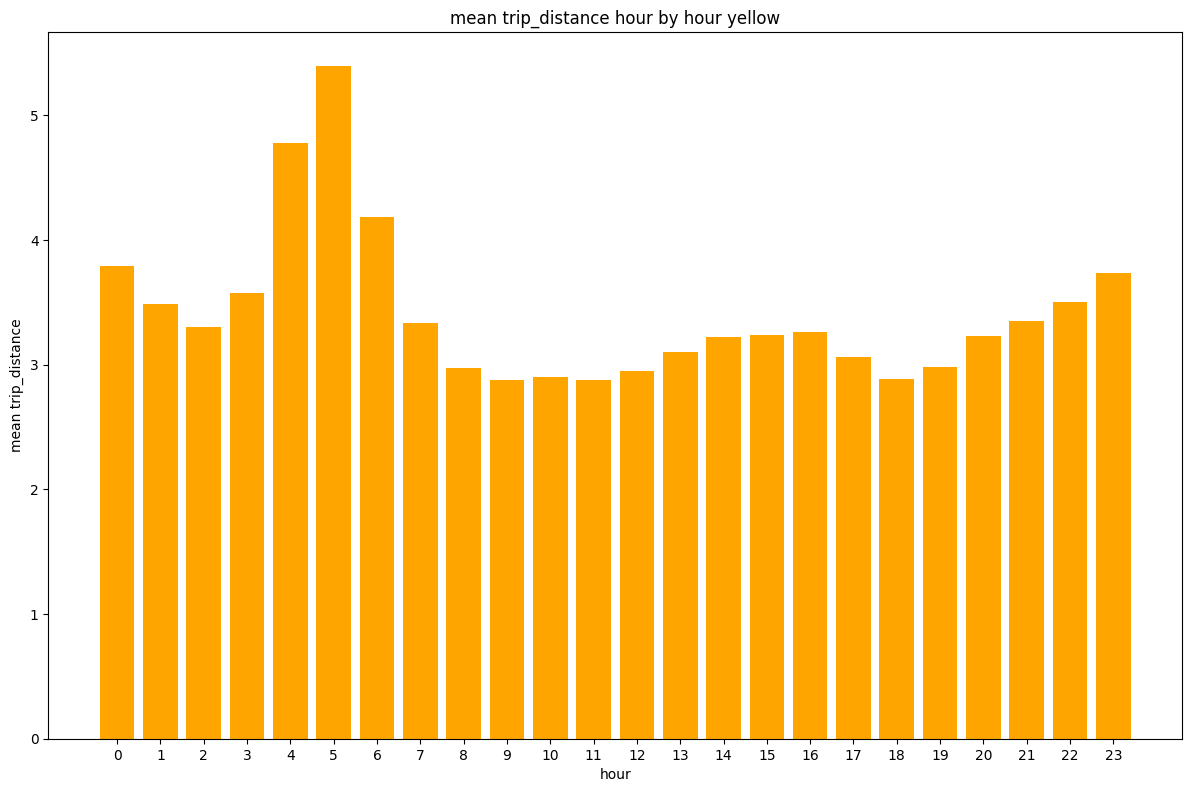

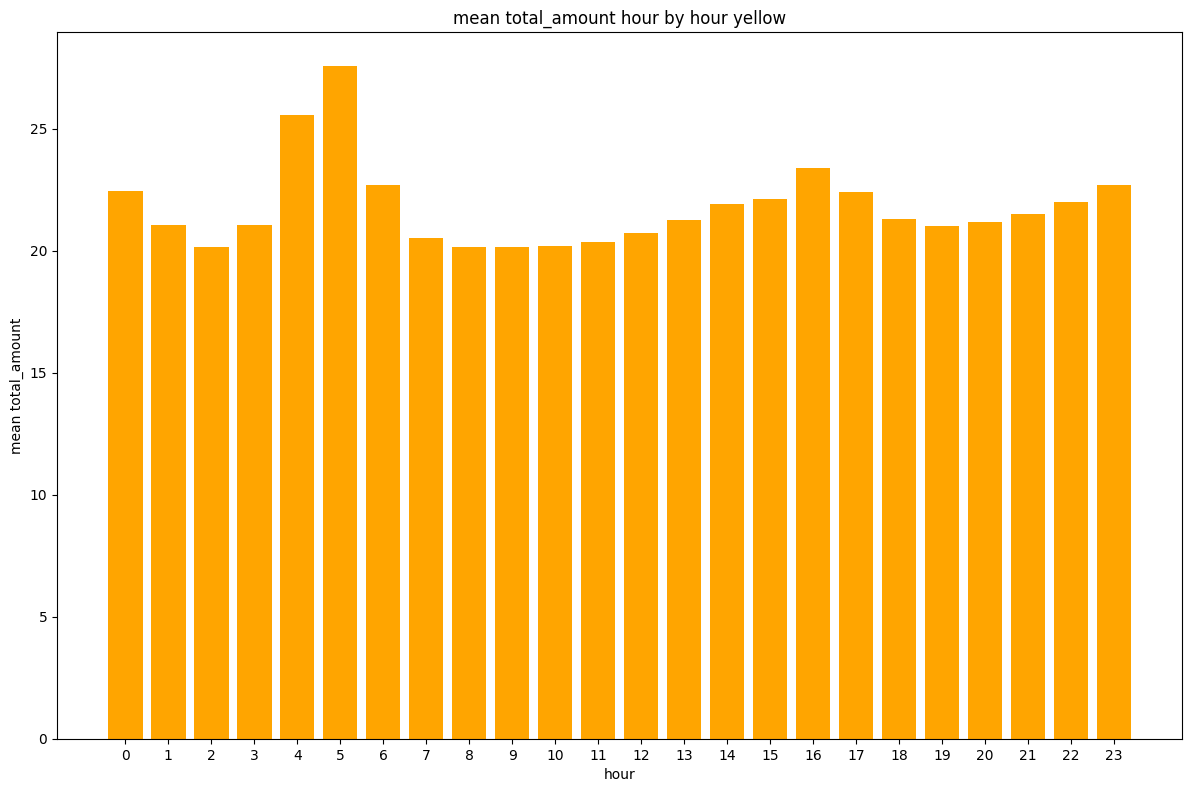

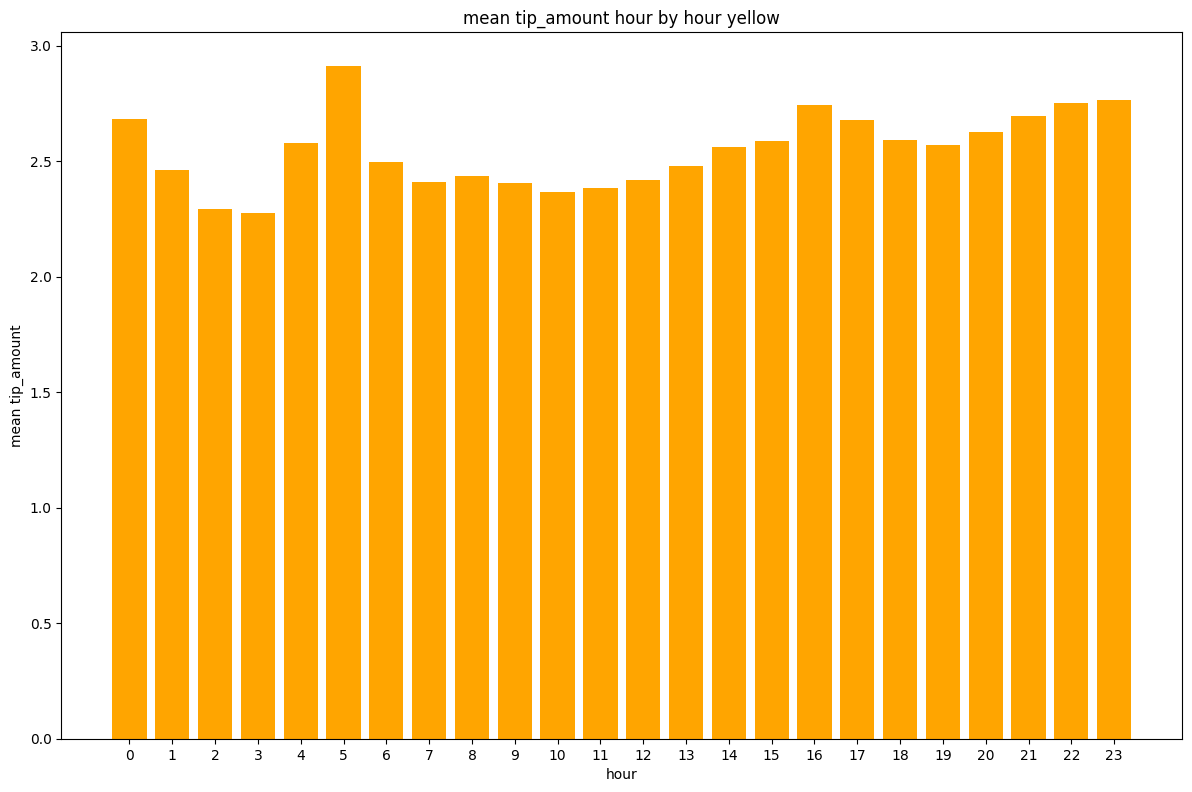

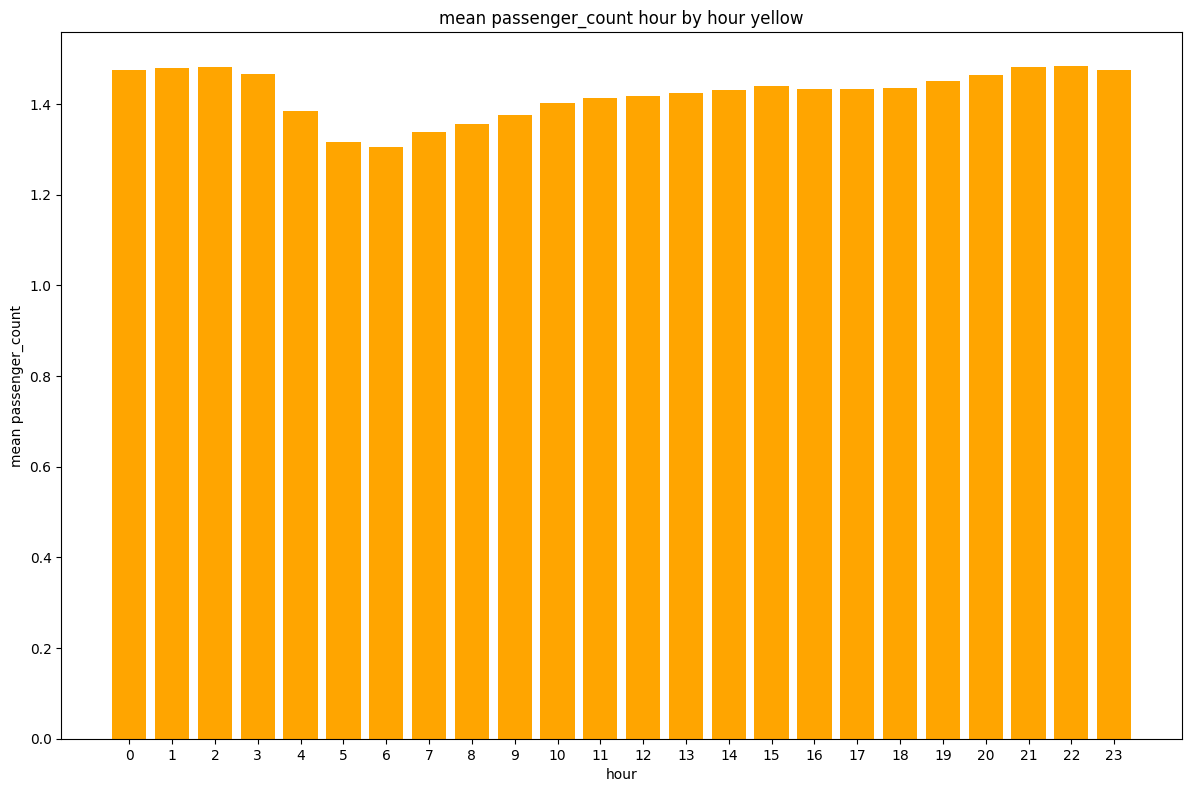

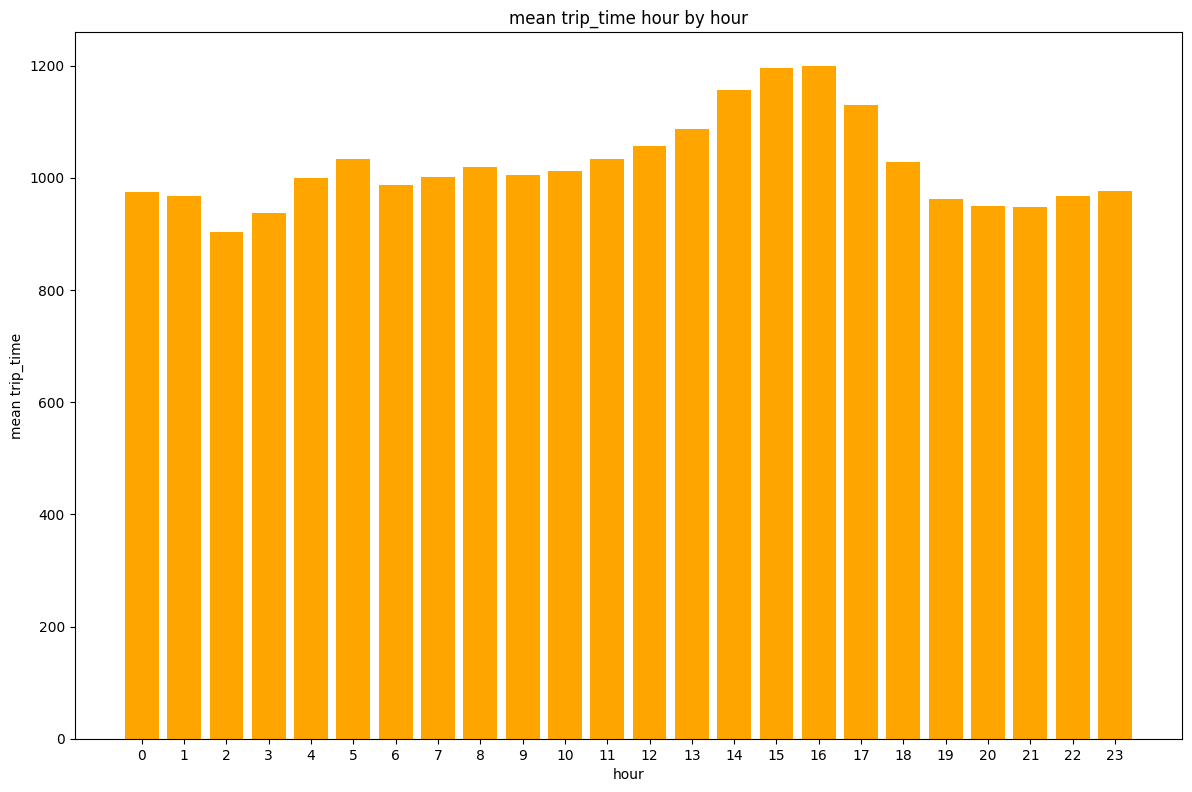

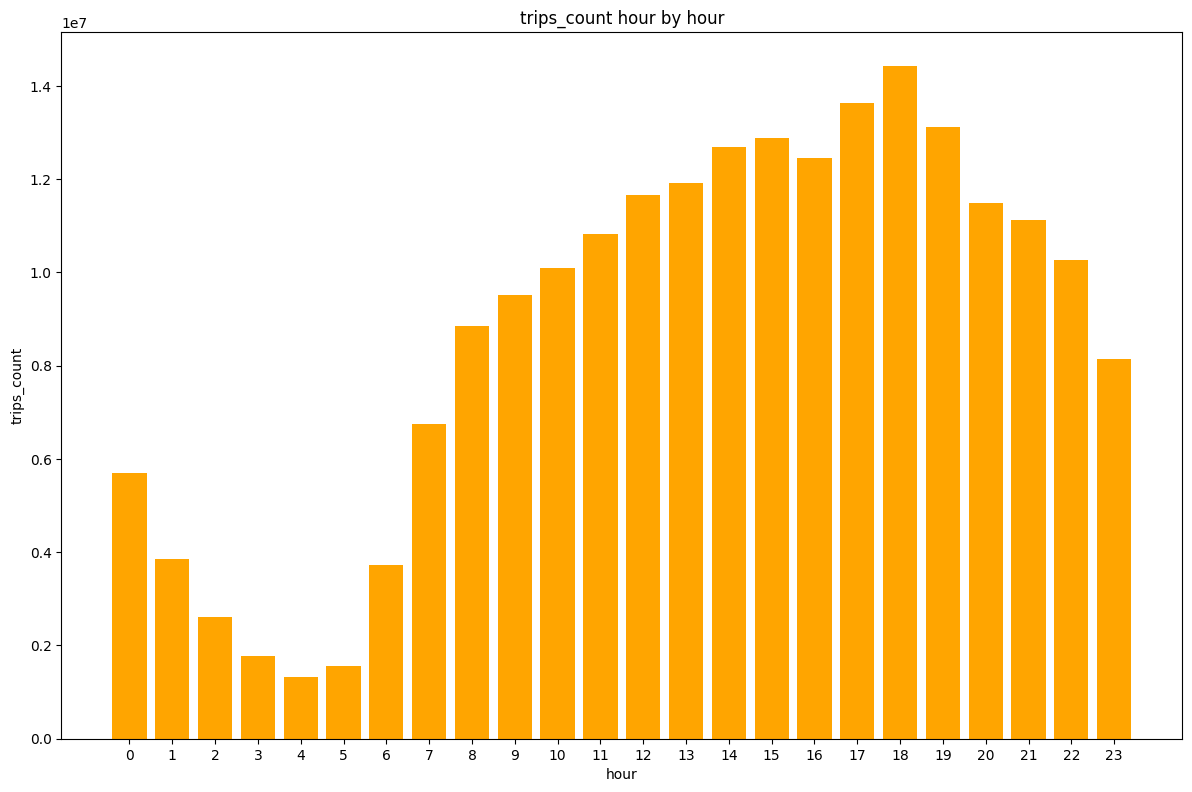

['trip_distance', 'total_amount', 'tip_amount', 'passenger_count']


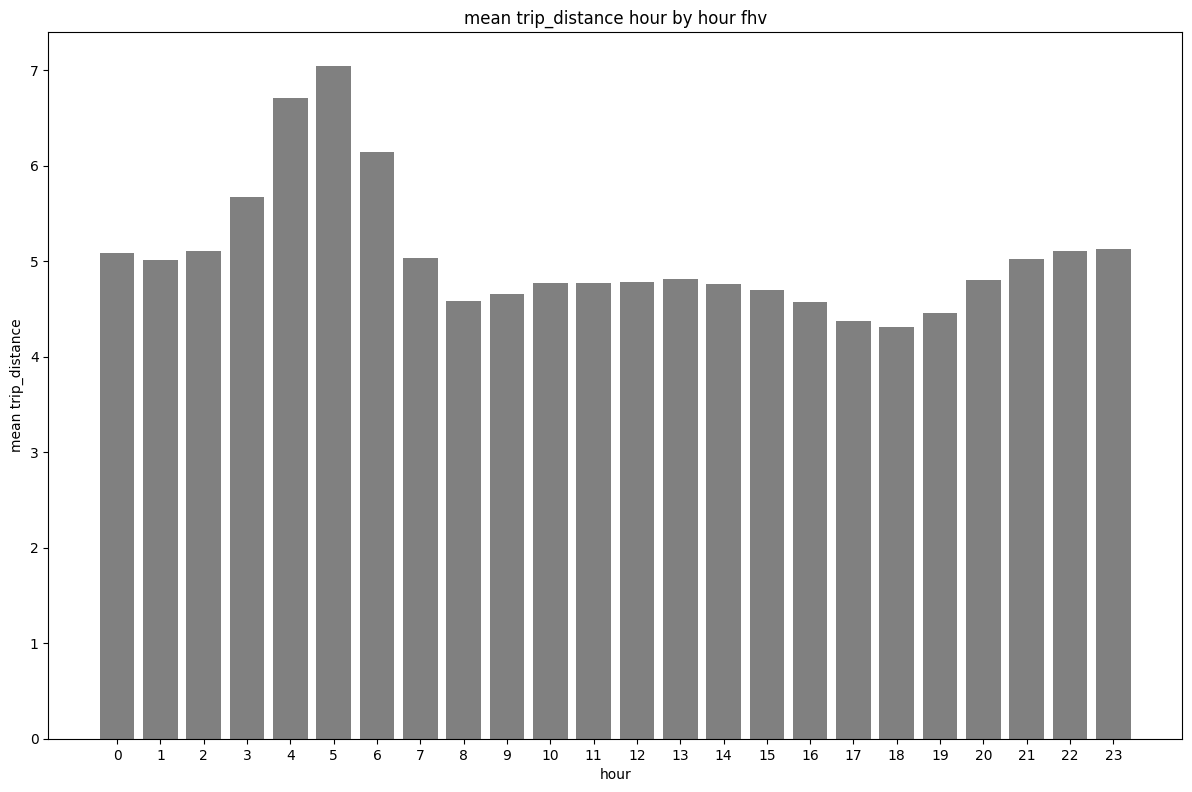

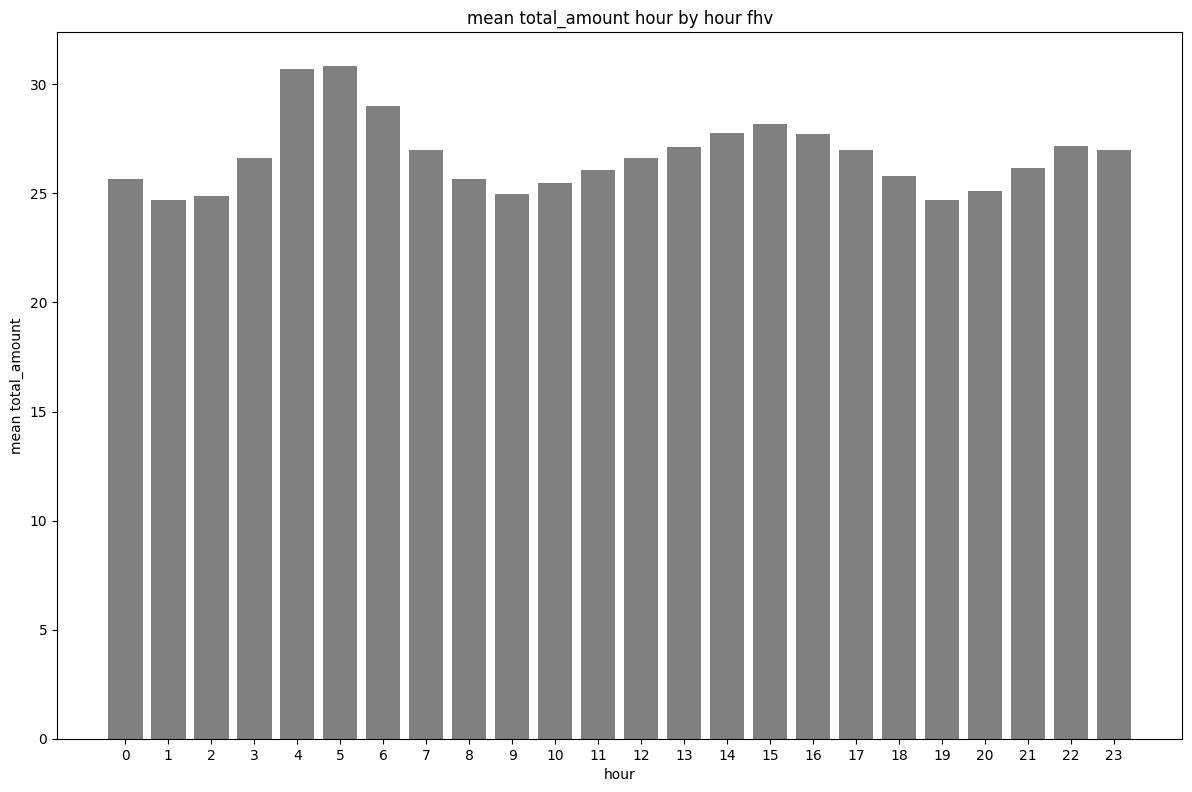

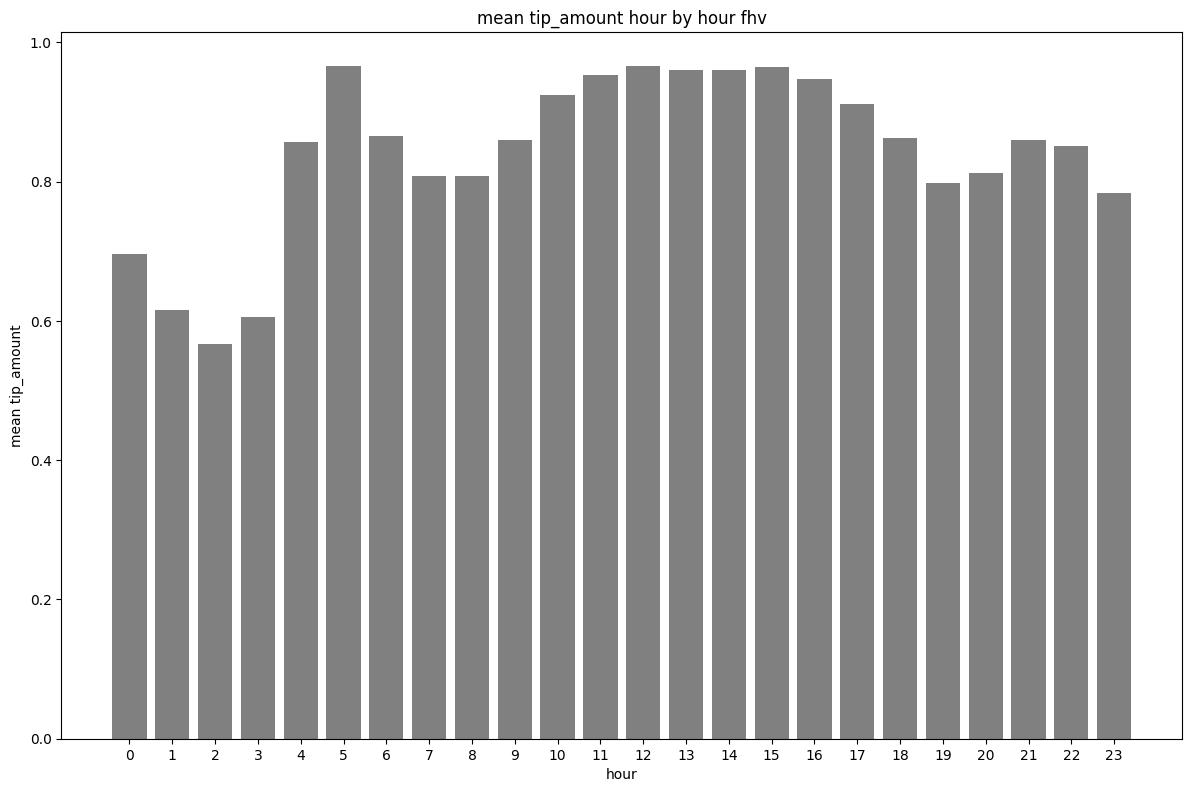

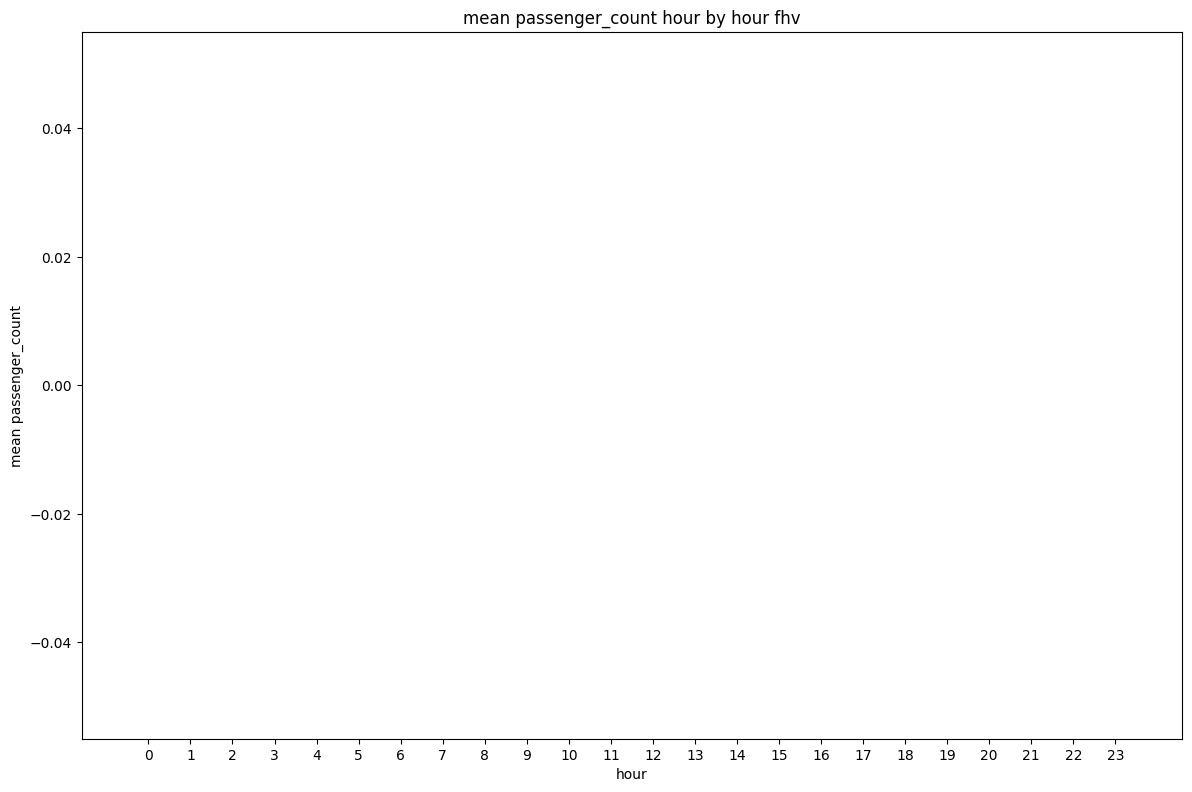

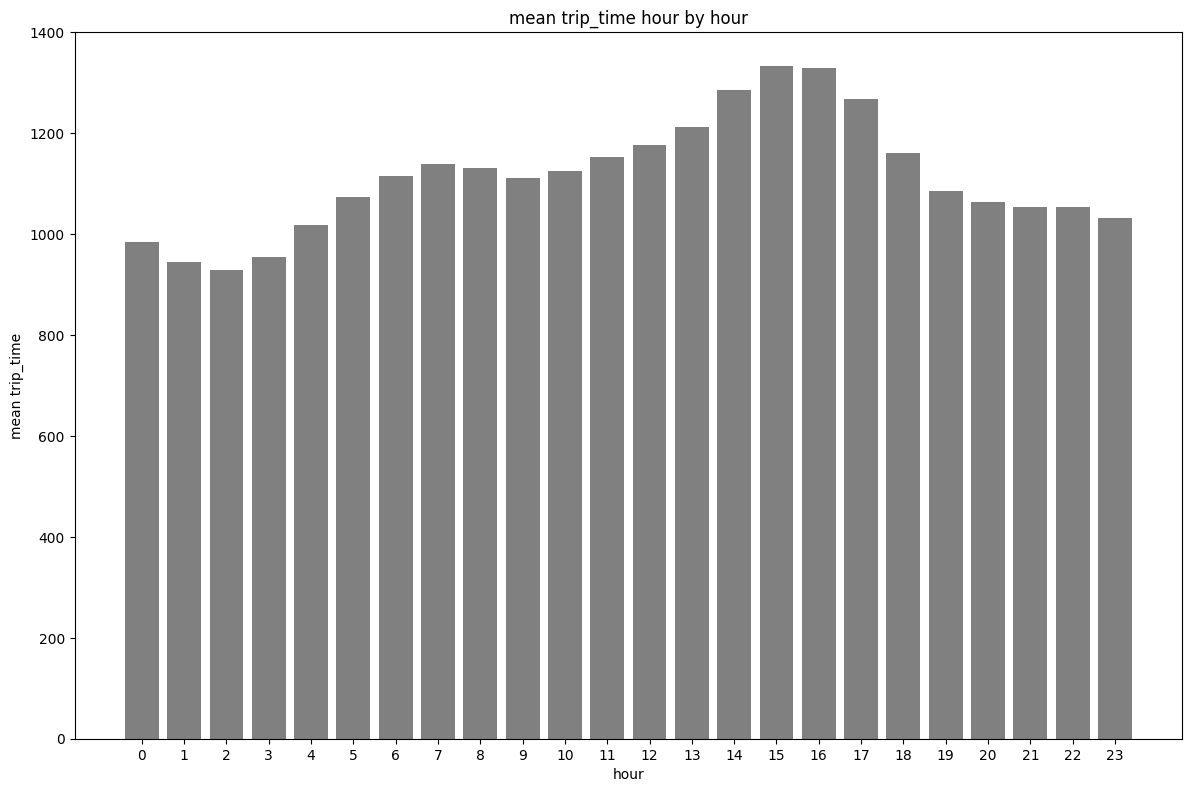

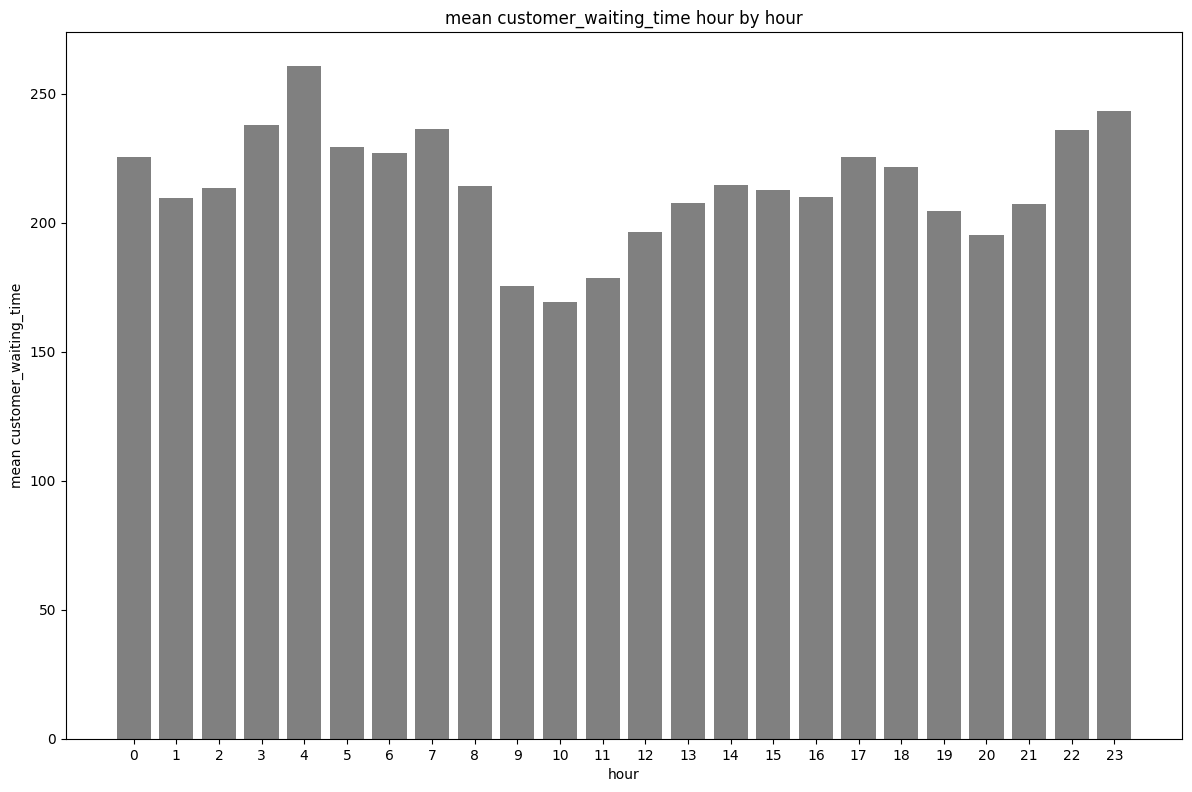

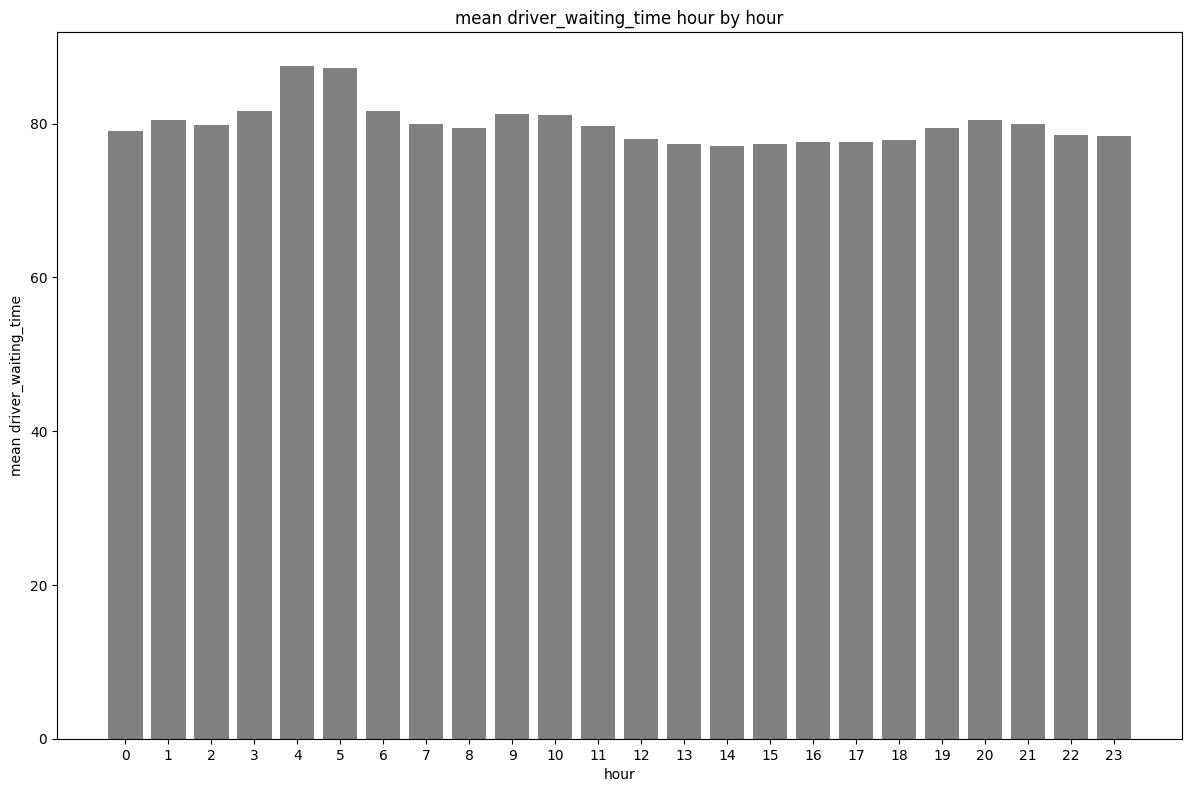

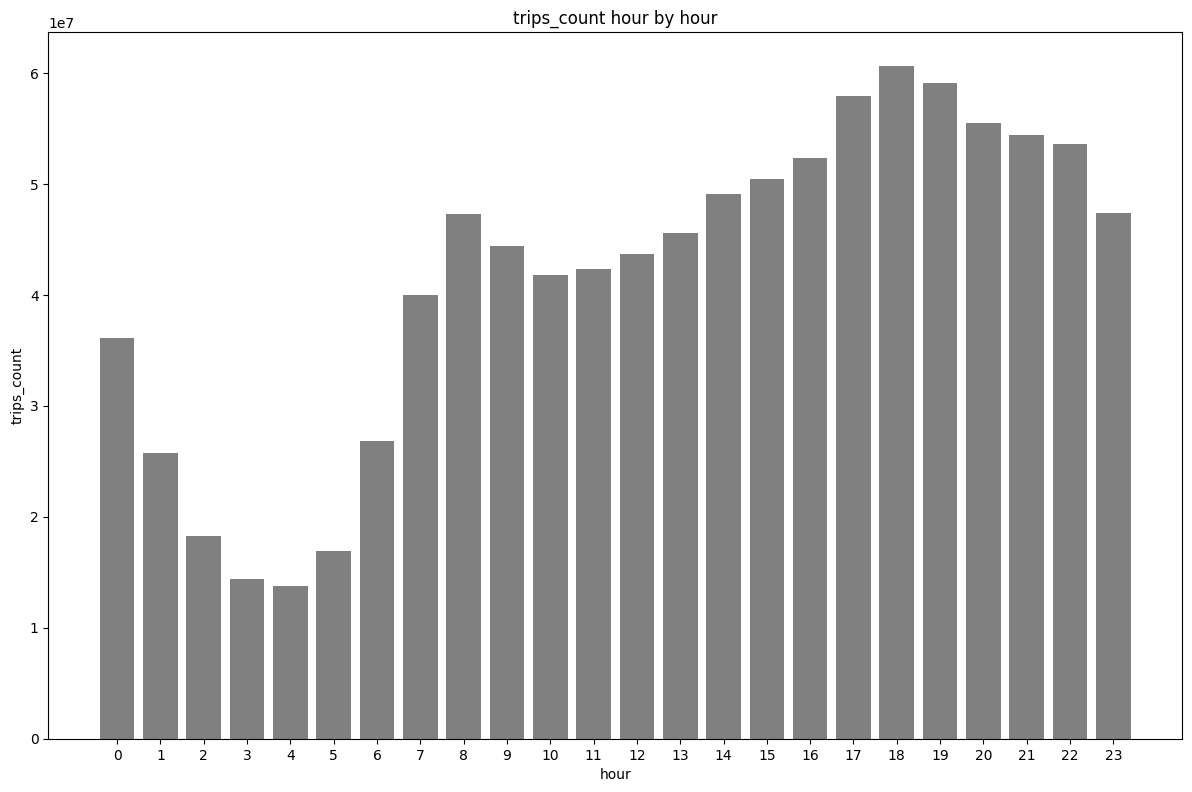

In [76]:
types = ['green', 'yellow', 'fhv']
colors = {
    'green': 'green',
    'yellow': 'orange', 
    'fhv': 'gray'
}

col_names_to_remove = ['year', 'month', 'hour', 'trip_count', 'trip_time', 'customer_waiting_time', 'driver_waiting_time']
time_column =  ['trip_time', 'customer_waiting_time', 'driver_waiting_time']

hours_df_dict = {f'hours_df_{v_type}': pd.read_csv(f'dataset_nyc_taxi/hour_csv/{v_type}_hour.csv') for v_type in types}

for v_type in types:
    hours_df = hours_df_dict[f'hours_df_{v_type}']

    numeric_columns = result_list = [x for x in list(hours_df.columns) if x not in col_names_to_remove]
    print(numeric_columns)

    for column in numeric_columns:
        sums = []
        count_sums = []

        for i in range(24):
            count = hours_df[hours_df['hour'] == i]['trip_count']
            count_sum = count.sum()
            count_sums.append(count_sum)
            col_sum = (count * hours_df[hours_df['hour'] == i][column]).sum()
            sums.append(col_sum/count_sum)

        plt.figure(figsize=(12, 8))
        plt.bar(range(24), sums, tick_label=range(24), color=colors[v_type])
        plt.xlabel('hour')
        plt.ylabel(f'mean {column}')
        plt.title(f'mean {column} hour by hour {v_type}')
        
        plt.tight_layout(pad=1)
        plt.savefig(f'plots/hour/{v_type}_{column}_hour_by_hour.png')
        plt.show()
        
    for column in time_column:
        if column in list(hours_df.columns):
            hours_df[column] = pd.to_timedelta(hours_df[column]).dt.total_seconds()
            sums = []
            for i in range(24):
                count = hours_df[hours_df['hour'] == i]['trip_count']
                count_sum = count.sum()
                col_sum = (count * hours_df[hours_df['hour'] == i][column]).sum()
                sums.append(col_sum/count_sum)
                
            plt.figure(figsize=(12, 8))
            plt.bar(range(24), sums, tick_label=range(24), color=colors[v_type])
            plt.xlabel('hour')
            plt.ylabel(f'mean {column}')
            plt.title(f'mean {column} hour by hour')
            
            plt.tight_layout(pad=1)
            plt.savefig(f'plots/hour/{v_type}_{column}_hour_by_hour.png')
            plt.show()

    plt.figure(figsize=(12, 8))
    plt.bar(range(24), count_sums, tick_label=range(24), color=colors[v_type])
    plt.xlabel('hour')
    plt.ylabel(f'trips_count')
    plt.title(f'trips_count hour by hour')
    
    plt.tight_layout(pad=1)
    plt.savefig(f'plots/hour/{v_type}_trips_count_hour_by_hour.png')
    plt.show()


In [77]:
hours_df = pd.read_csv(f'dataset_nyc_taxi/weekday_csv/fhv_weekday.csv')
hours_df

,trip_count,trip_time,trip_distance,total_amount,tip_amount,passenger_count,year,month,weekday,customer_waiting_time,driver_waiting_time
0,2458421,0 days 00:18:25.866418322,4.847702,19.808668,0.490471,NaN,2019,1,0,0 days 00:02:47.607561379,0 days 00:02:16.508691557
1,2536410,0 days 00:18:30.370029293,4.543671,19.571036,0.502081,NaN,2019,1,1,0 days 00:02:49.664401075,0 days 00:02:18.490923328
2,2719253,0 days 00:19:01.336906863,4.550468,20.072473,0.494472,NaN,2019,1,2,0 days 00:02:49.896044701,0 days 00:02:18.797753633
3,2792197,0 days 00:20:05.332022418,4.749123,21.126453,0.529698,NaN,2019,1,3,0 days 00:02:49.474018917,0 days 00:02:19.472180217
4,3120463,0 days 00:19:36.225192864,4.597347,19.992948,0.491427,NaN,2019,1,4,0 days 00:02:50.124199611,0 days 00:02:19.313982394
...,...,...,...,...,...,...,...,...,...,...,...
408,2501493,0 days 00:21:08.749922546,5.115241,34.474287,1.402703,NaN,2023,11,2,0 days 00:03:36.708329298,0 days 00:01:04.088014278
409,2676099,0 days 00:21:48.079256036,5.154292,35.059831,1.400552,NaN,2023,11,3,0 days 00:03:39.515899777,0 days 00:01:04.953994410
410,3687040,0 days 00:20:58.090207863,5.003729,32.658609,1.223493,NaN,2023,11,4,0 days 00:03:52.050696524,0 days 00:01:04.236265213
411,3624614,0 days 00:20:08.842579651,5.092659,31.687090,1.147738,NaN,2023,11,5,0 days 00:03:40.465051897,0 days 00:01:02.927464161


['trip_distance', 'total_amount', 'tip_amount', 'passenger_count']


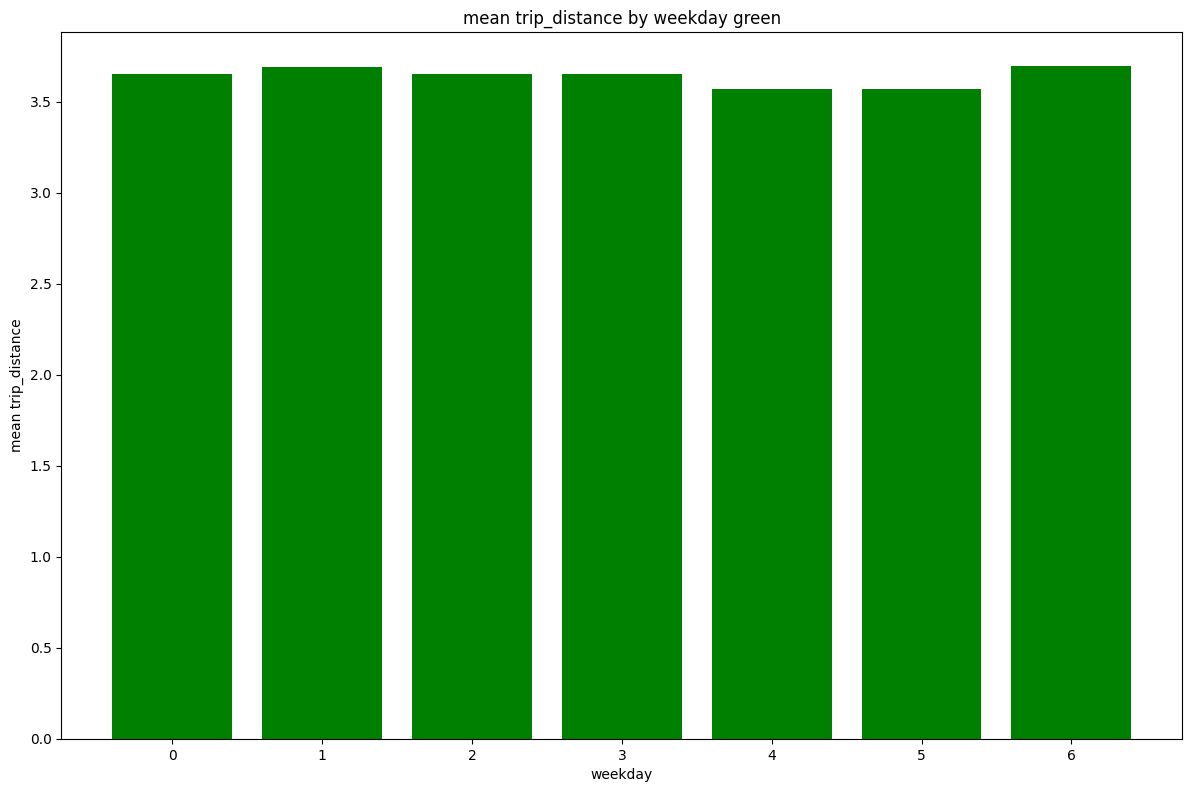

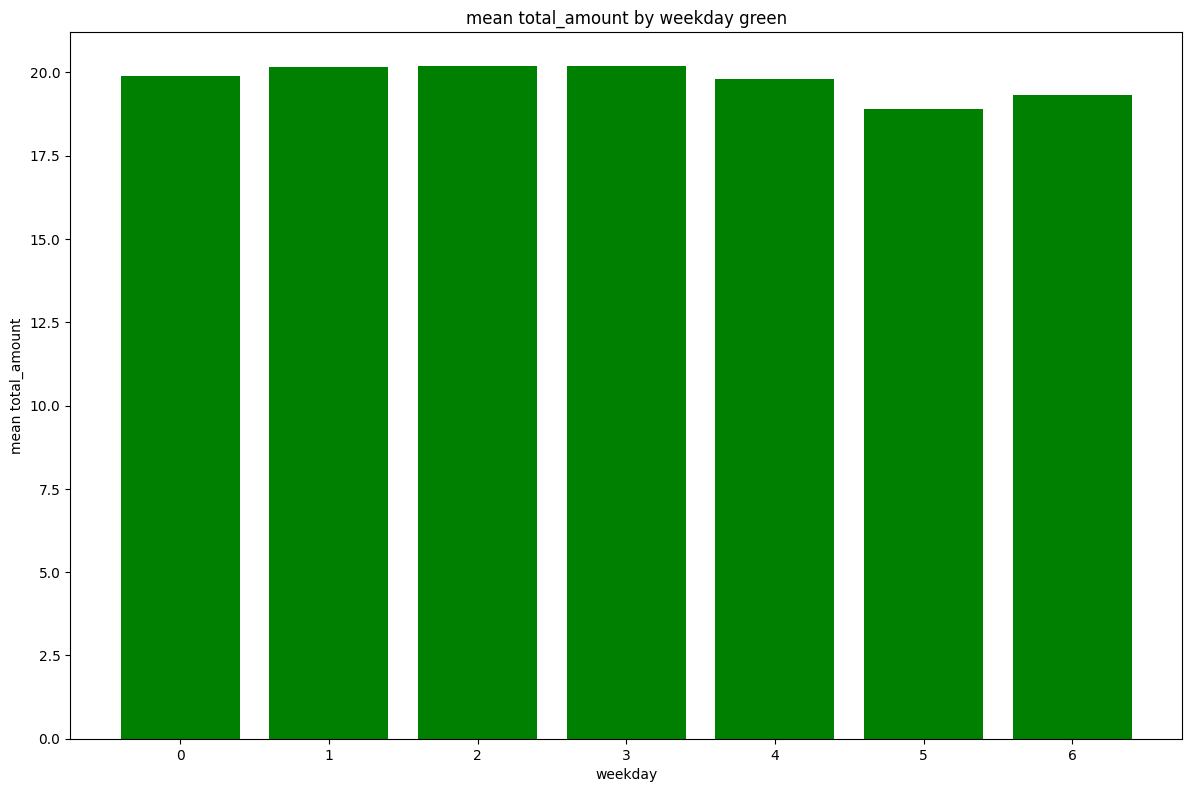

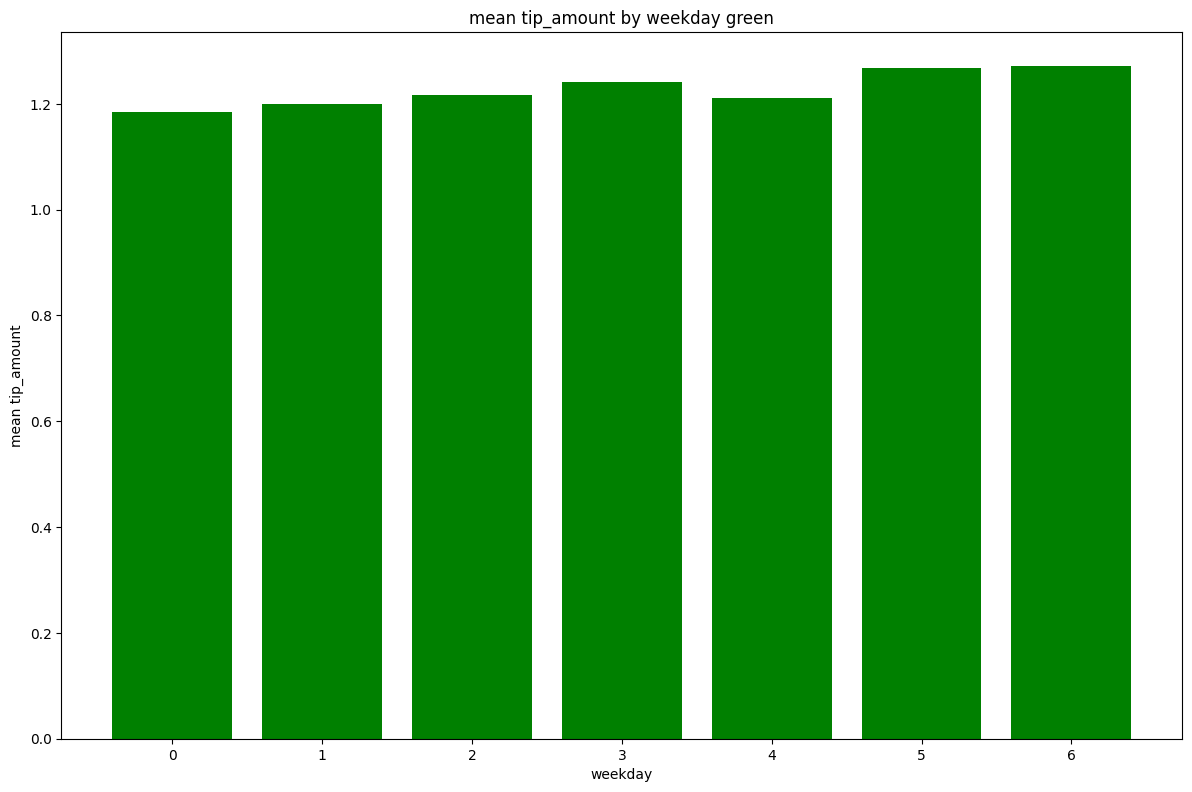

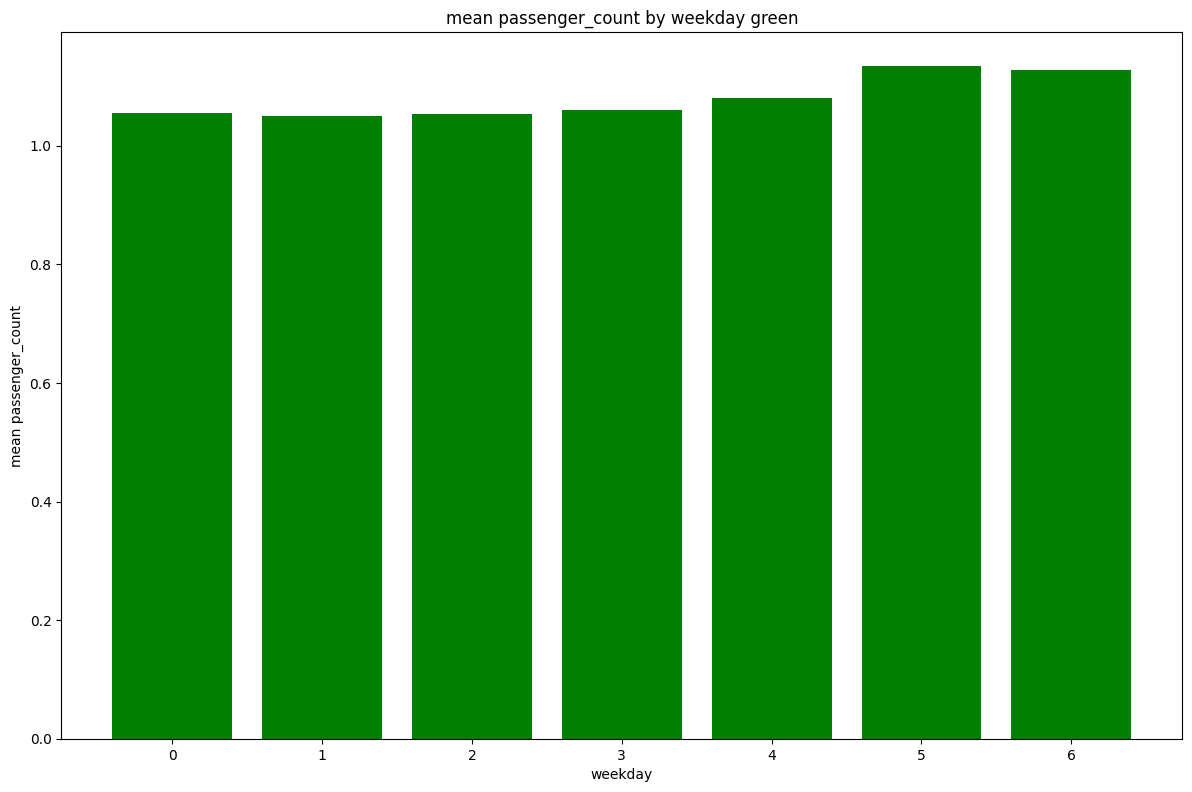

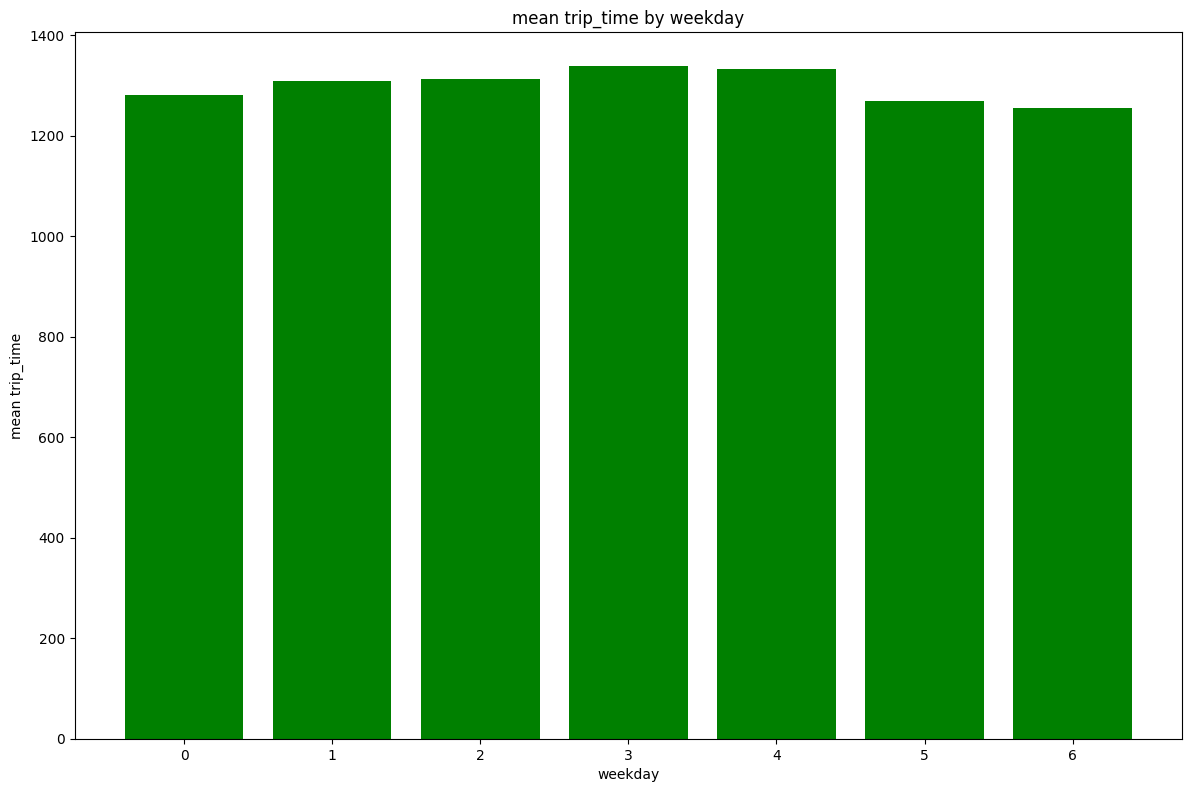

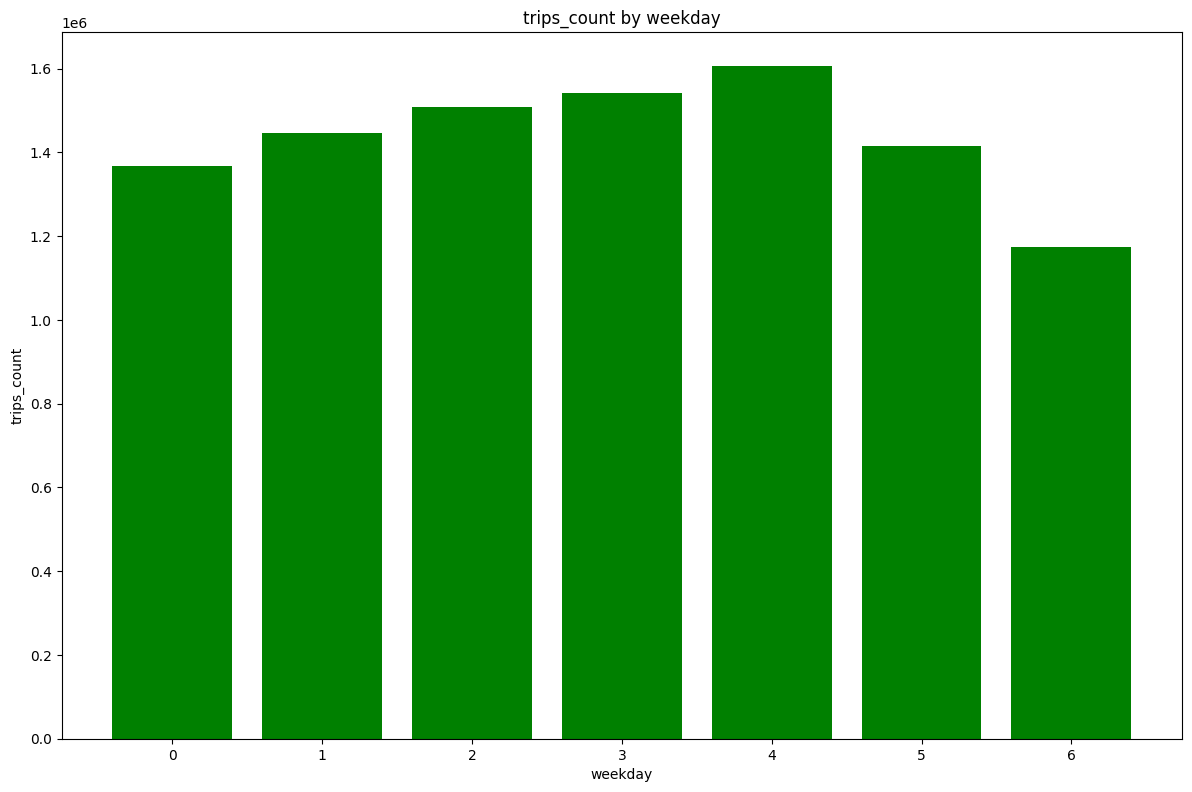

['trip_distance', 'total_amount', 'tip_amount', 'passenger_count']


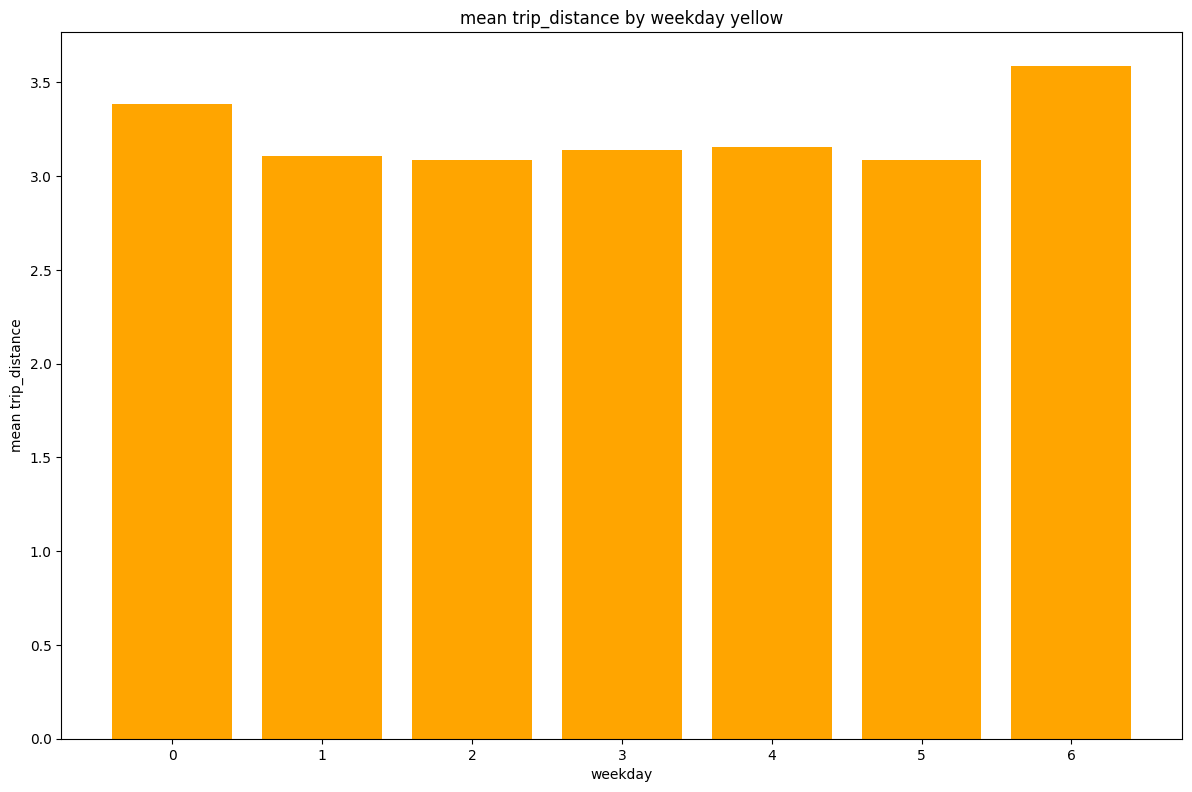

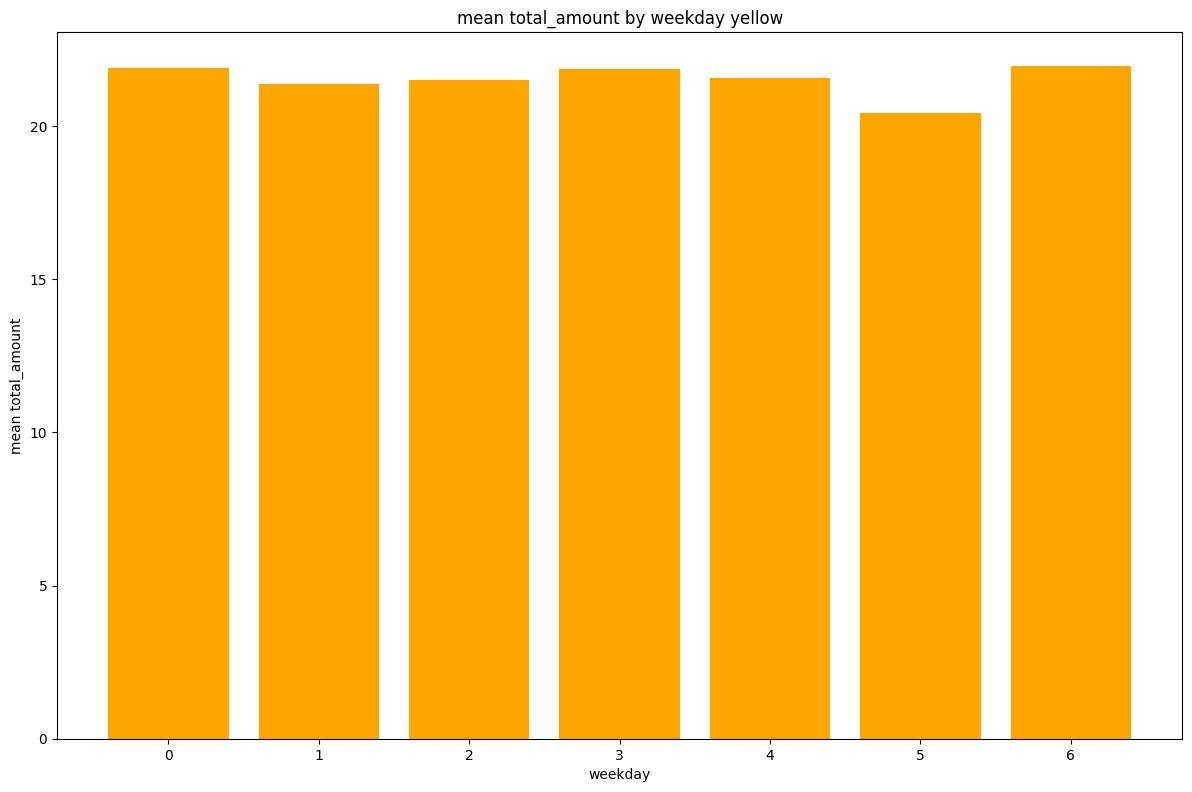

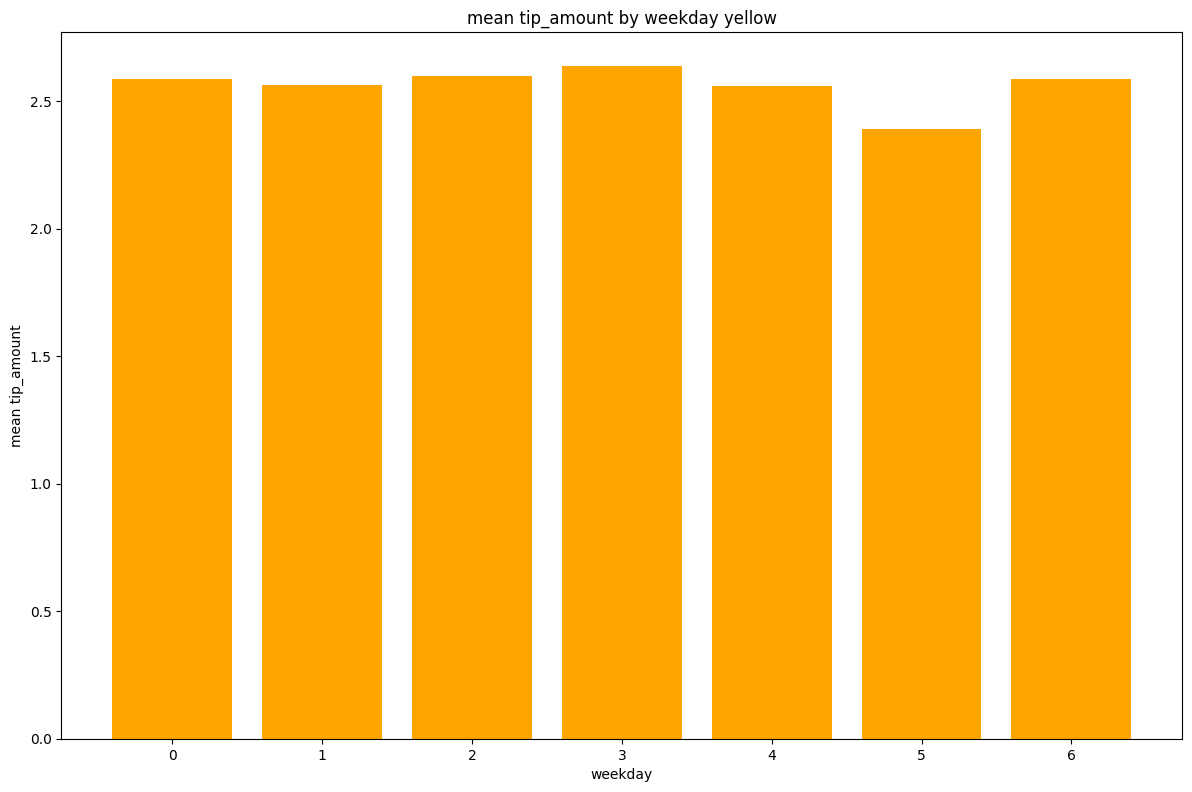

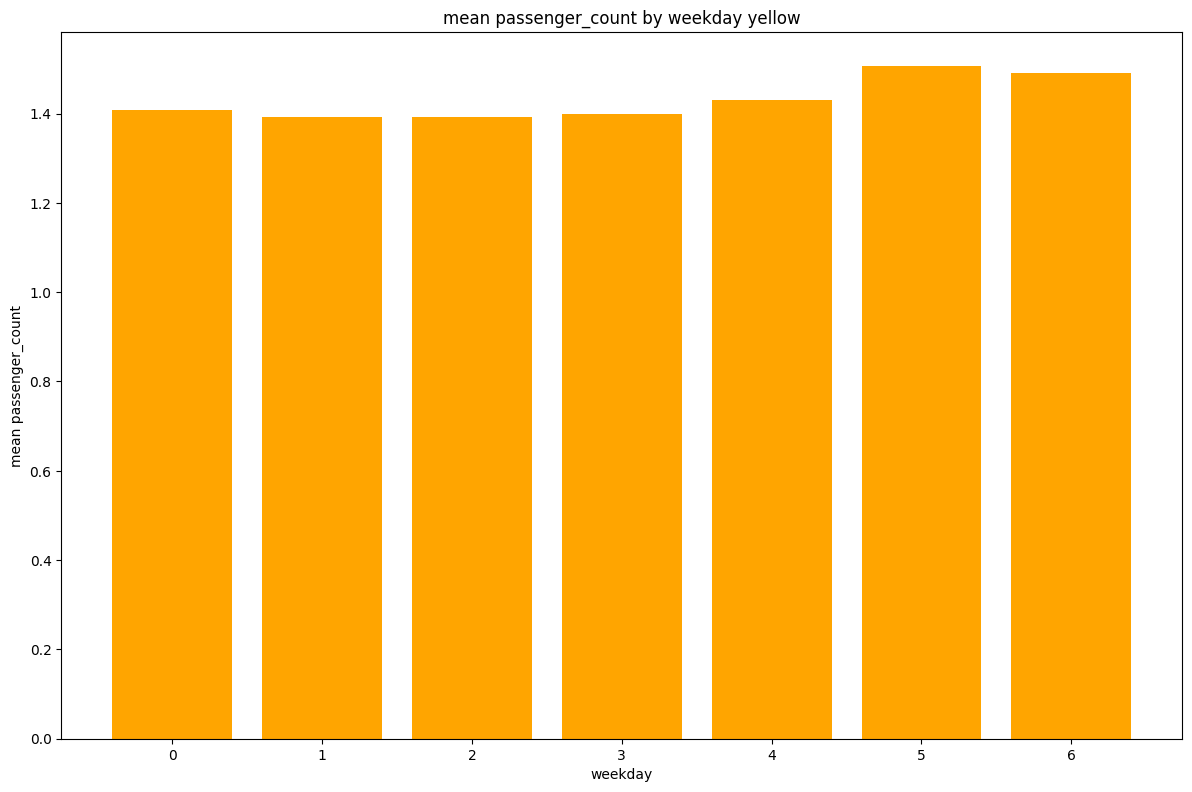

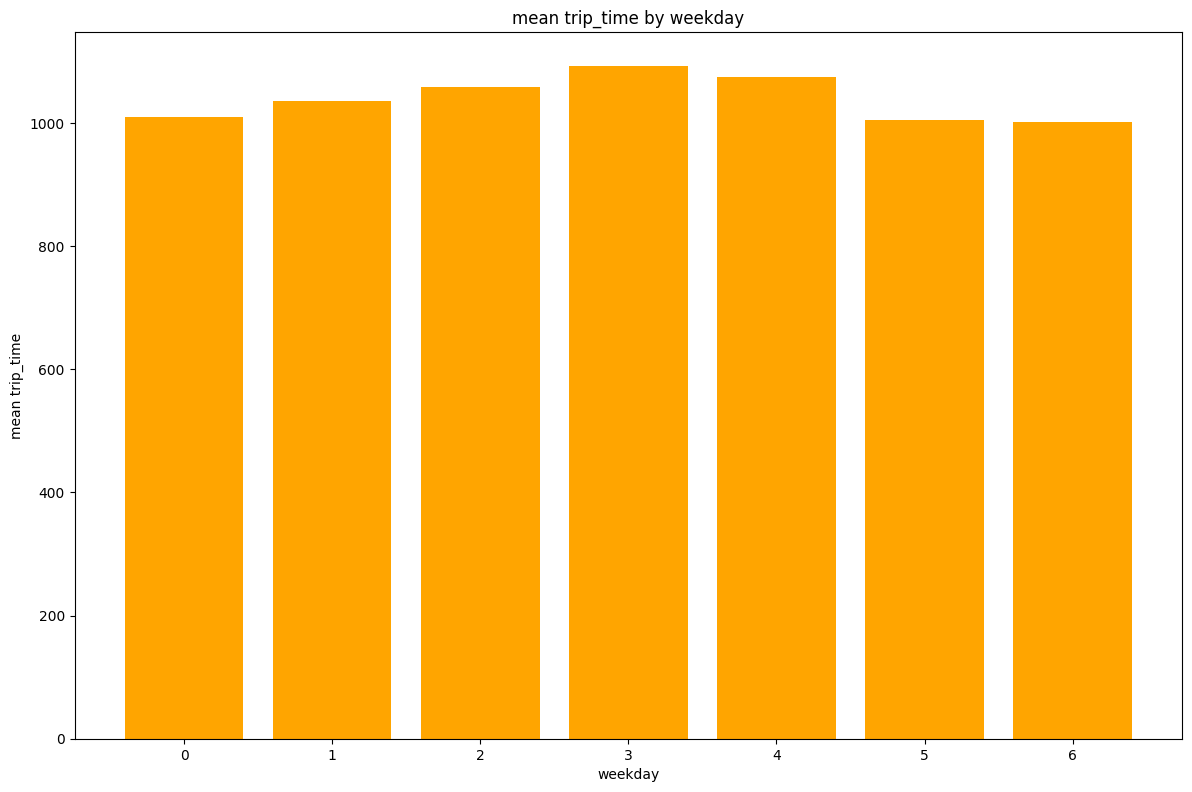

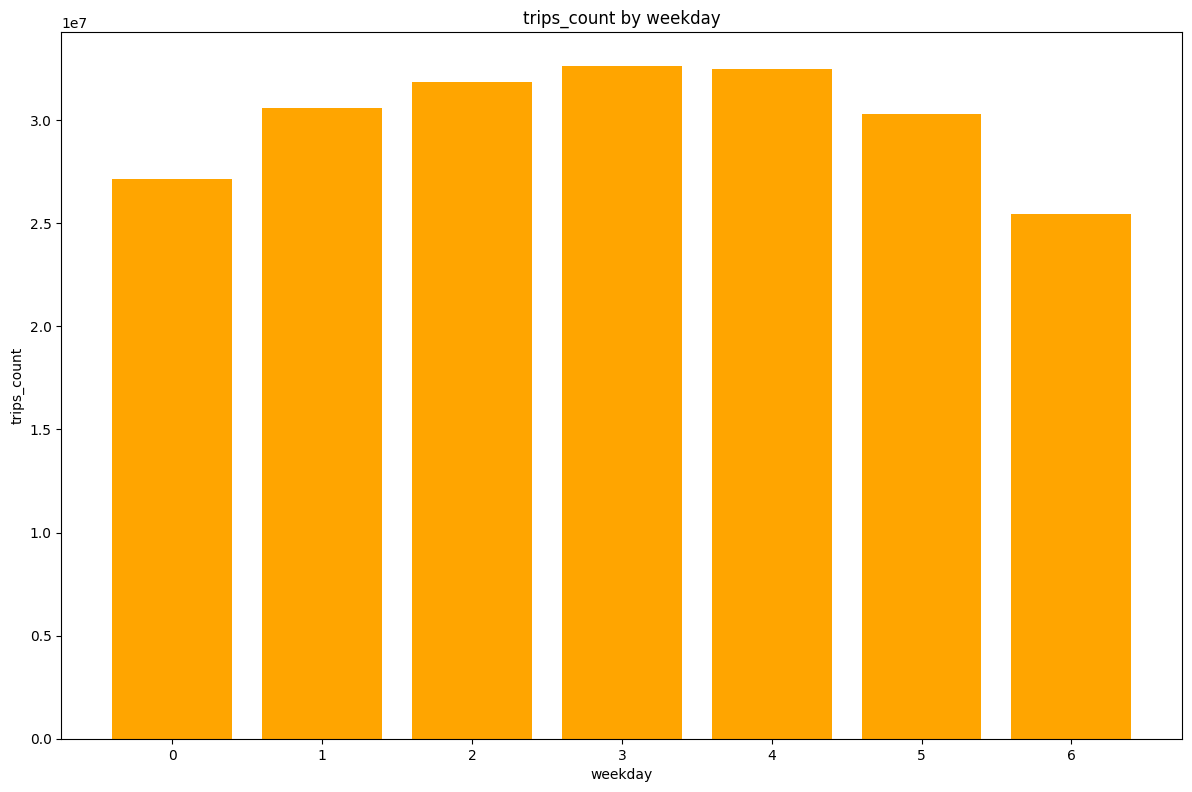

['trip_distance', 'total_amount', 'tip_amount', 'passenger_count']


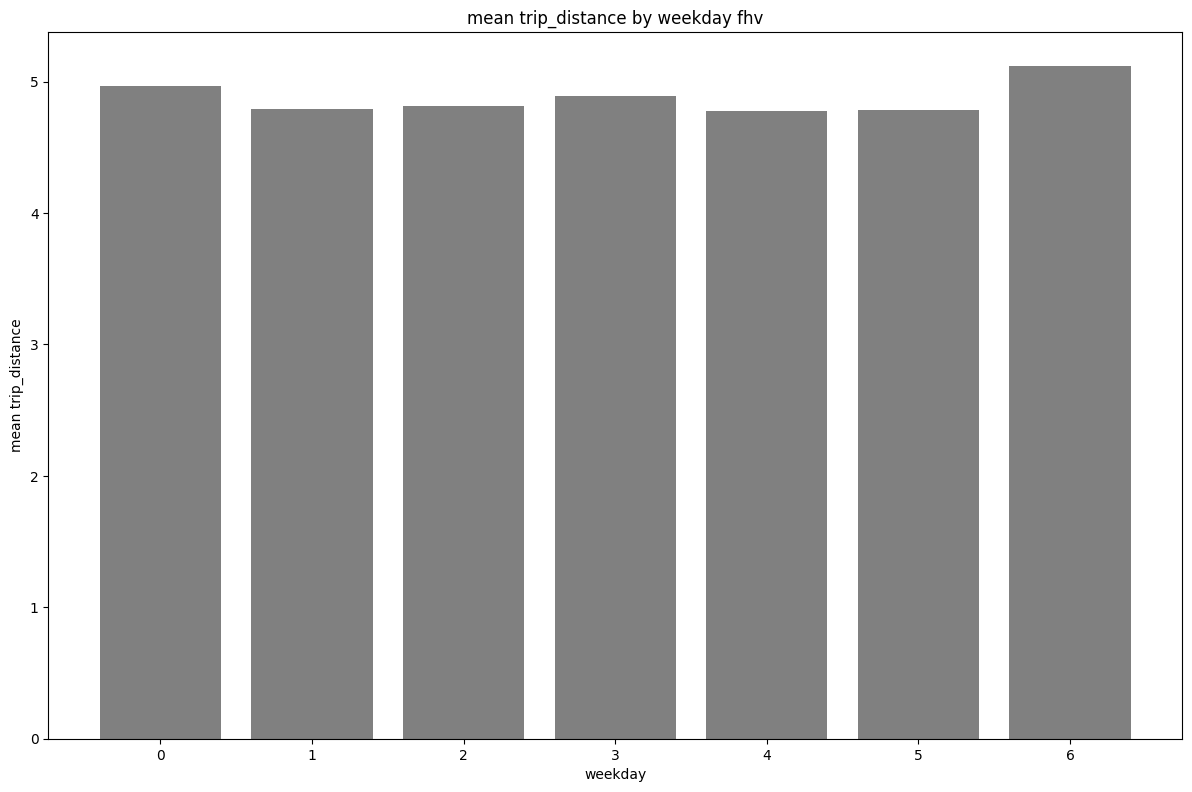

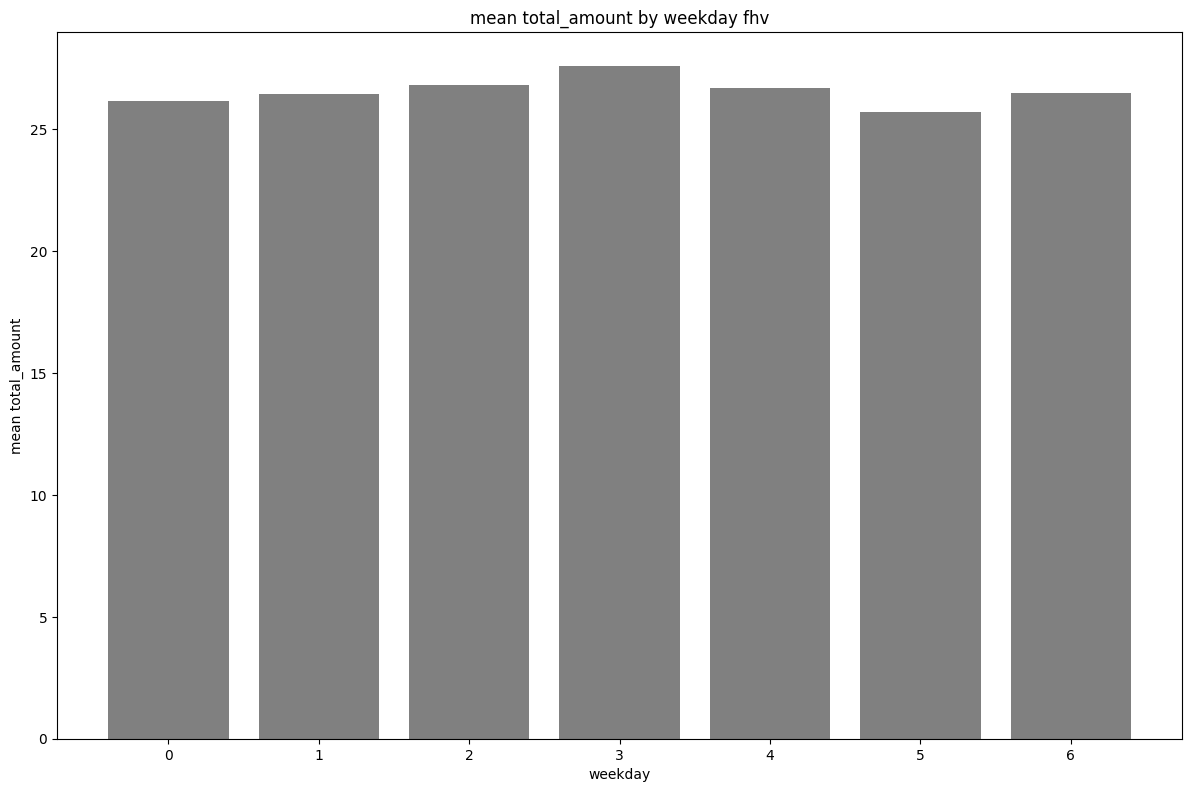

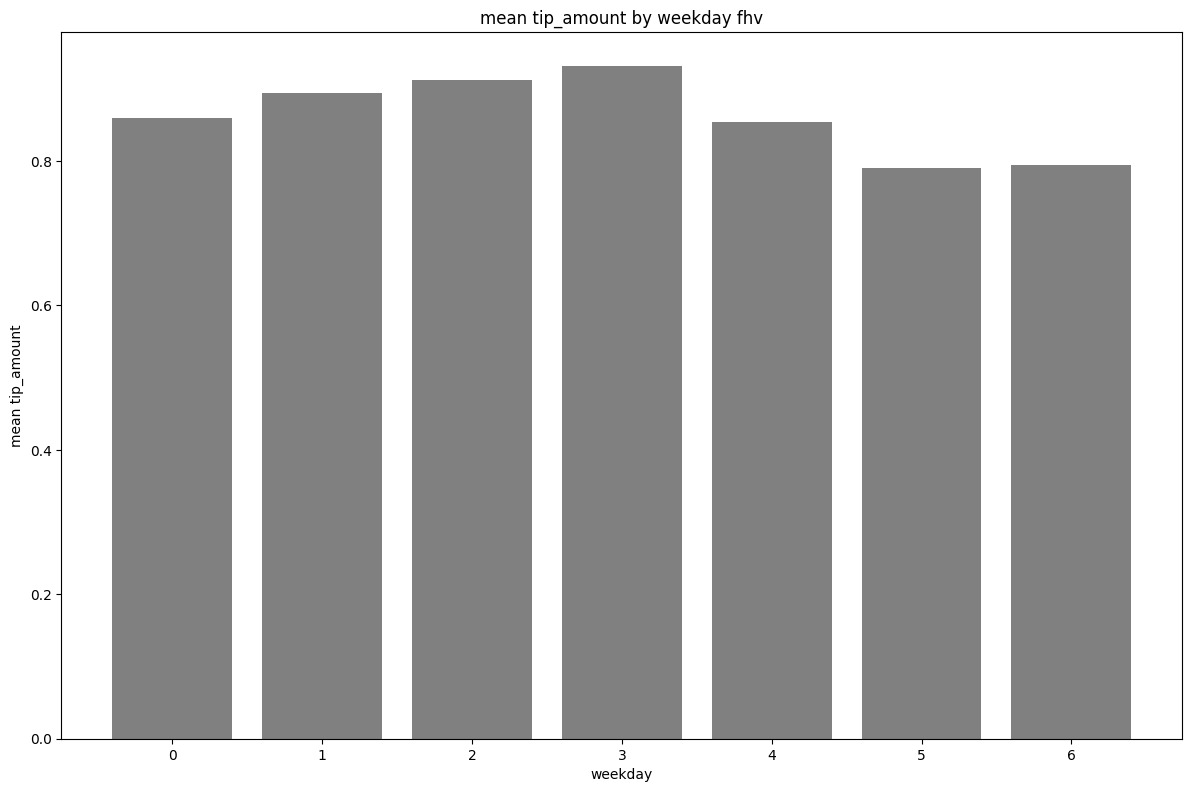

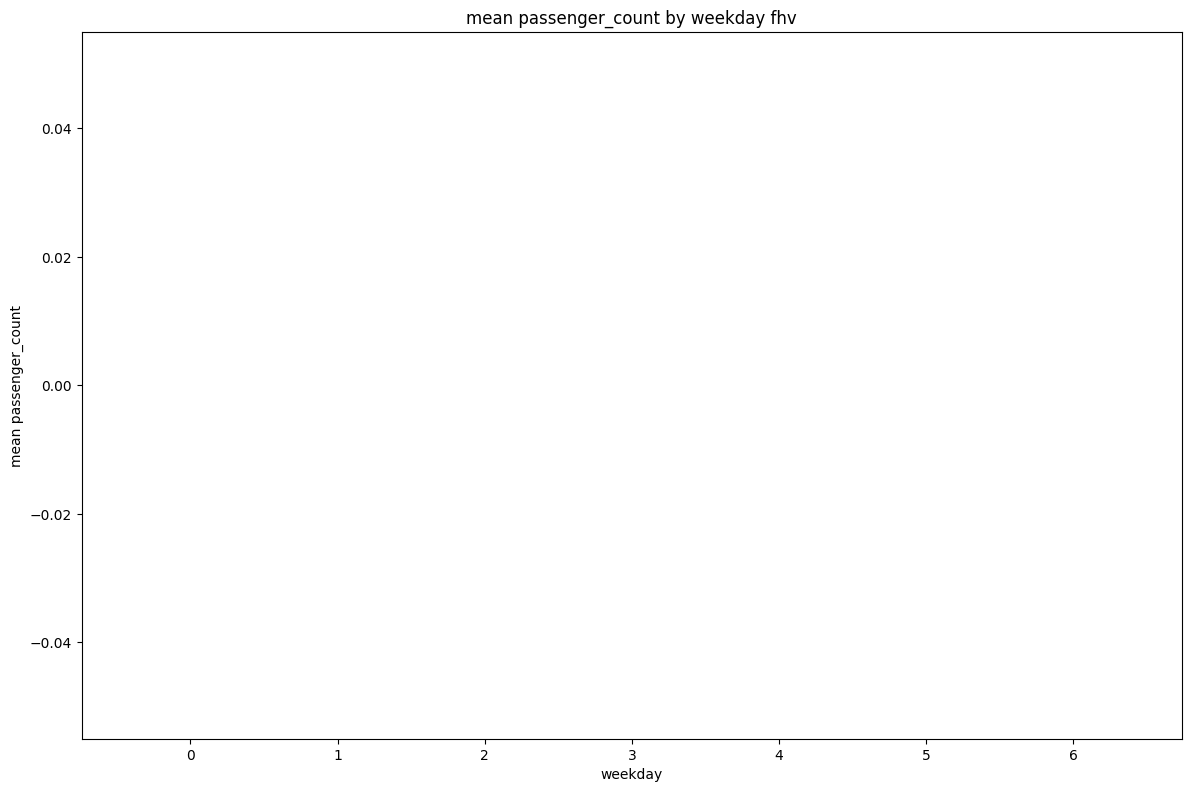

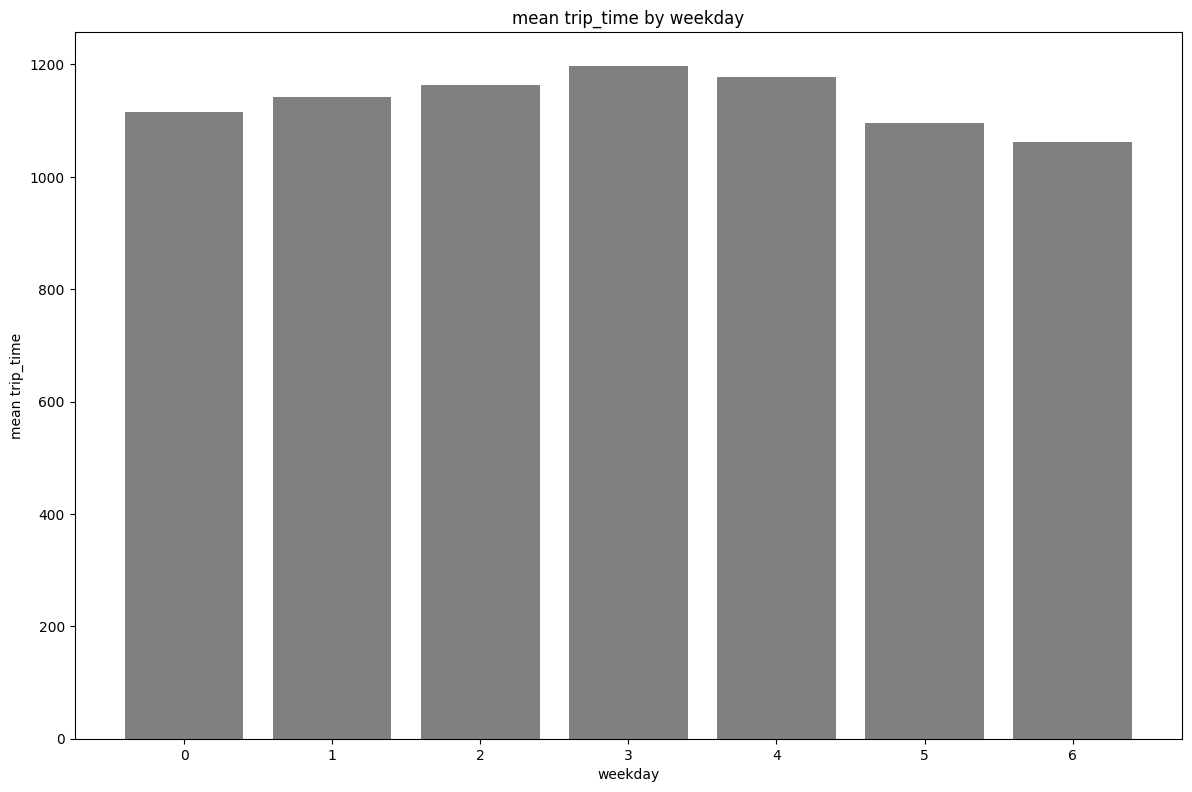

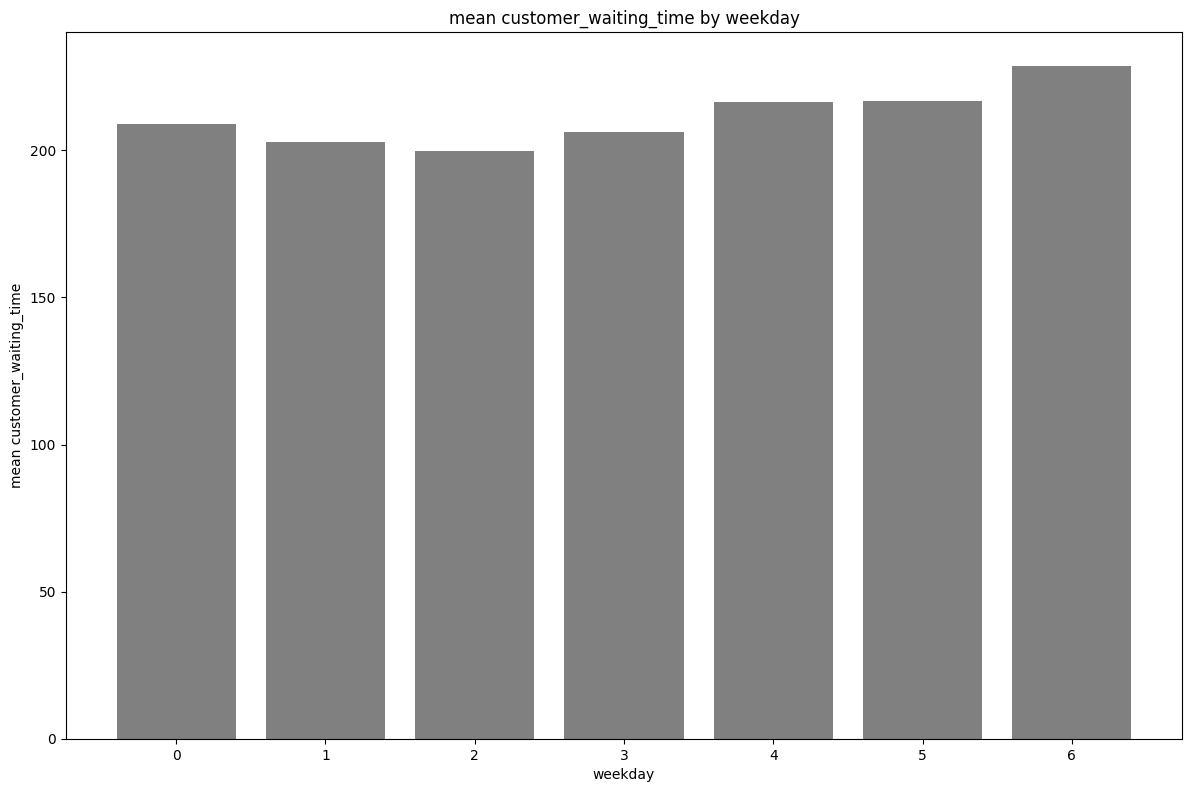

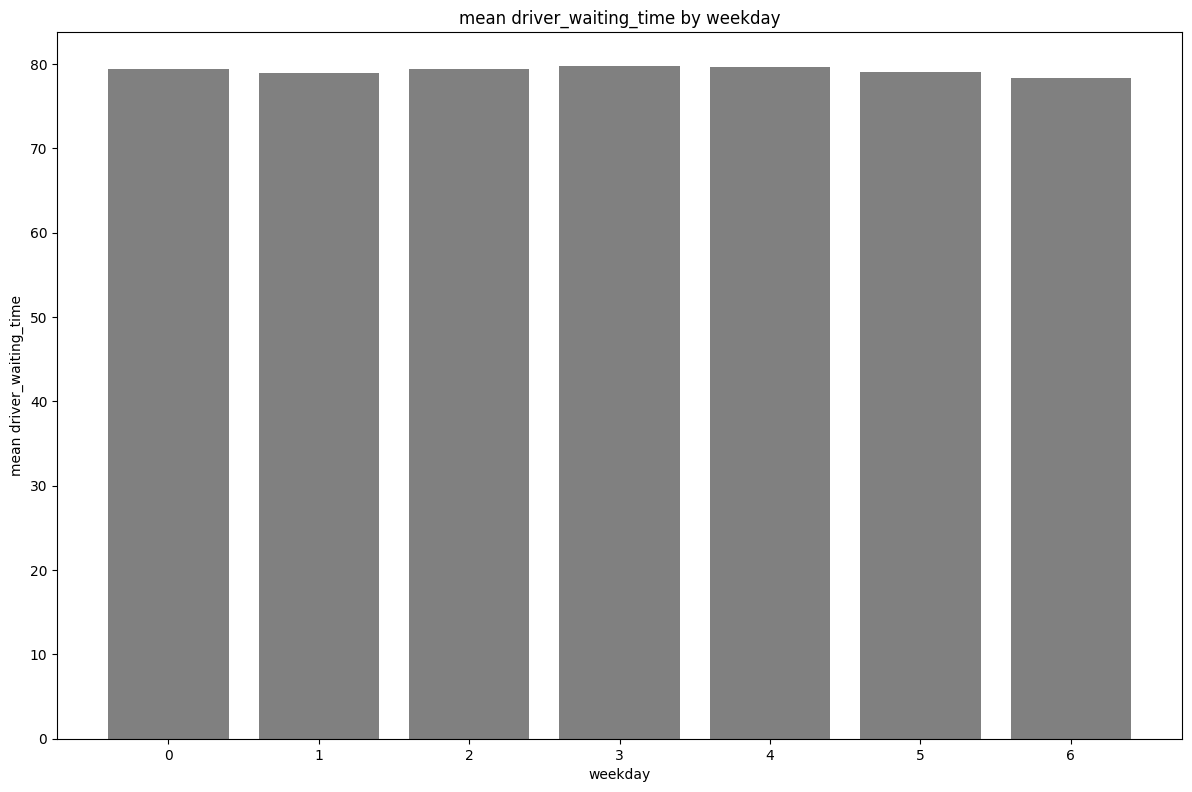

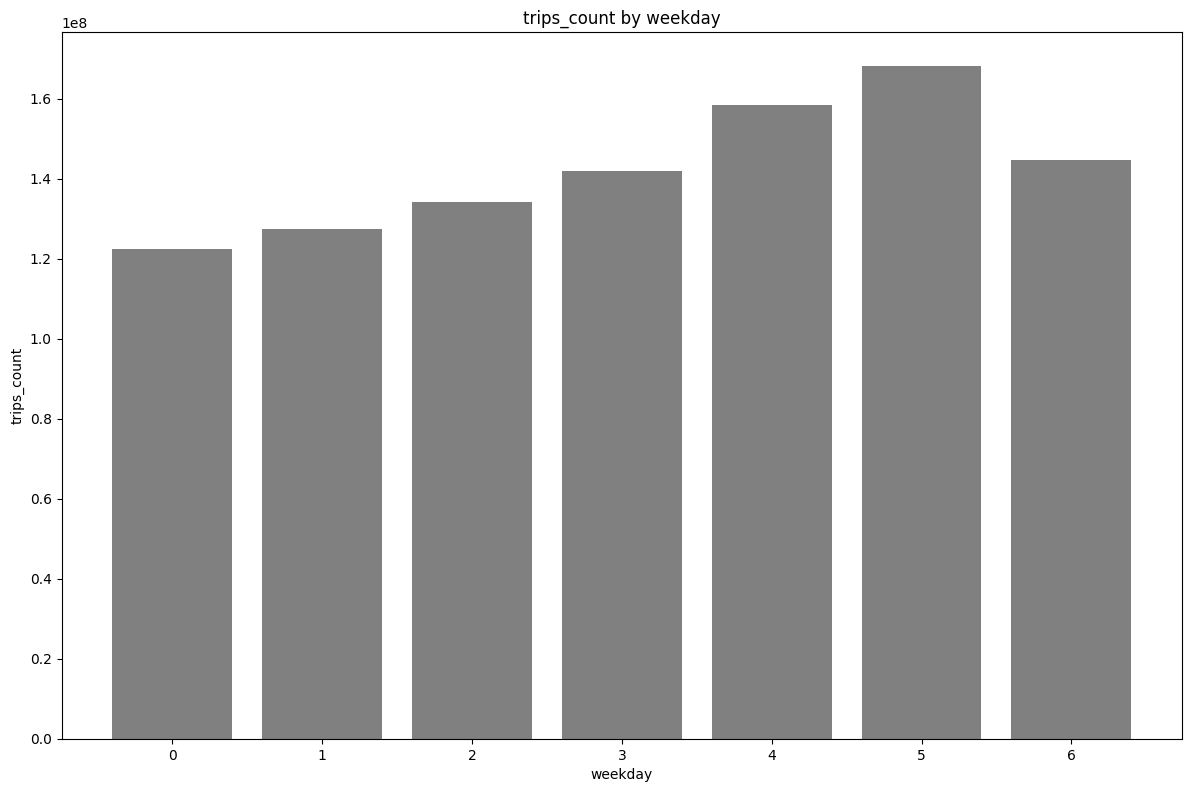

In [81]:
types = ['green', 'yellow', 'fhv']
colors = {
    'green': 'green',
    'yellow': 'orange', 
    'fhv': 'gray'
}

col_names_to_remove = ['year', 'month', 'weekday', 'trip_count', 'trip_time', 'customer_waiting_time', 'driver_waiting_time']
time_column =  ['trip_time', 'customer_waiting_time', 'driver_waiting_time']

hours_df_dict = {f'weekday_df_{v_type}': pd.read_csv(f'dataset_nyc_taxi/weekday_csv/{v_type}_weekday.csv') for v_type in types}

for v_type in types:
    hours_df = hours_df_dict[f'weekday_df_{v_type}']

    numeric_columns = result_list = [x for x in list(hours_df.columns) if x not in col_names_to_remove]
    print(numeric_columns)
    
    RANGE = 7
    
    for column in numeric_columns:
        sums = []
        count_sums = []

        for i in range(RANGE):
            count = hours_df[hours_df['weekday'] == i]['trip_count']
            count_sum = count.sum()
            count_sums.append(count_sum)
            col_sum = (count * hours_df[hours_df['weekday'] == i][column]).sum()
            sums.append(col_sum/count_sum)

        plt.figure(figsize=(12, 8))
        plt.bar(range(RANGE), sums, tick_label=range(RANGE), color=colors[v_type])
        plt.xlabel('weekday')
        plt.ylabel(f'mean {column}')
        plt.title(f'mean {column} by weekday {v_type}')
        
        plt.tight_layout(pad=1)
        plt.savefig(f'plots/weekday/{v_type}_{column}_by_weekday.png')
        plt.show()
        
    for column in time_column:
        if column in list(hours_df.columns):
            hours_df[column] = pd.to_timedelta(hours_df[column]).dt.total_seconds()
            sums = []
            for i in range(RANGE):
                count = hours_df[hours_df['weekday'] == i]['trip_count']
                count_sum = count.sum()
                col_sum = (count * hours_df[hours_df['weekday'] == i][column]).sum()
                sums.append(col_sum/count_sum)
                
            plt.figure(figsize=(12, 8))
            plt.bar(range(RANGE), sums, tick_label=range(RANGE), color=colors[v_type])
            plt.xlabel('weekday')
            plt.ylabel(f'mean {column}')
            plt.title(f'mean {column} by weekday')
            
            plt.tight_layout(pad=1)
            plt.savefig(f'plots/weekday/{v_type}_{column}_by_weekday.png')
            plt.show()

    plt.figure(figsize=(12, 8))
    plt.bar(range(RANGE), count_sums, tick_label=range(RANGE), color=colors[v_type])
    plt.xlabel('weekday')
    plt.ylabel(f'trips_count')
    plt.title(f'trips_count by weekday')
    
    plt.tight_layout(pad=1)
    plt.savefig(f'plots/weekday/{v_type}_trips_count_by_weekday.png')
    plt.show()